# IMPORTAÇÕES E DEFINIÇÕES

## Importação de Bibliotecas e Pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.classifier import ConfusionMatrix

## Definições

In [2]:
# função para fit do modelo e criação de visualização
def fit_model(model, X_train, y_train, X_test, y_test, plot_X, df_name):
    
    # definindo os modelos de regressão linear
    linear_model = model
    
    # realizando o treinamento para criação dos modelos
    linear_model.fit(X_train, y_train)
    
    # realizando a predição do dataframe de teste a partir do modelo treinado
    predictions = linear_model.predict(X_test)
    
    # imprimindo métricas associadas ao modelo
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # criando visualização dos ajustes para avaliação visual
    plt.scatter(X_test[plot_X], y_test, color='red')
    plt.scatter(X_test[plot_X], predictions, color='blue')
    plt.xlabel(plot_X)
    plt.ylabel('weight')
    plt.title('{} metrics: MSE: {:.1f} | R2: {:.2f}'.format(df_name, mse, r2))
    
    return linear_model, predictions, mse, r2

## Criação dos Dataframes

### Dataframe fish

#### Criação e preparação básica do dataframe

In [3]:
# importação do dataframe
df_raw = pd.read_csv('datasets/linear_model/fish.csv')
df_raw.columns = ['species', 'weight', 'vertical_length', 'diagonal_length', 'cross_length', 'height', 'width']
df_raw.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# imprimindo a quantidade de registros e parâmetros do dataframe
print('Quantidade de linhas: {}'.format(df_raw.shape[0]))
print('Quantidade de colunas: {}'.format(df_raw.shape[1]))

Quantidade de linhas: 159
Quantidade de colunas: 7


In [5]:
# verificando o tipo e a quantidade de registros faltantes em cada parâmetro
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          159 non-null    object 
 1   weight           159 non-null    float64
 2   vertical_length  159 non-null    float64
 3   diagonal_length  159 non-null    float64
 4   cross_length     159 non-null    float64
 5   height           159 non-null    float64
 6   width            159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# verificando os estimadores das variáveis numéricas
num_att = df_raw.select_dtypes(include = ['int64', 'float64'])

# estimadores de localização
mean_ = pd.DataFrame(num_att.apply(np.mean)).T
median_ = pd.DataFrame(num_att.apply(np.median)).T
min_ = pd.DataFrame(num_att.apply(np.min)).T
max_ = pd.DataFrame(num_att.apply(np.max)).T

# estimadores de variabilidade
std_ = pd.DataFrame(num_att.apply(np.std)).T
range_ = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T

# skewness e kurtosis
skew_ = pd.DataFrame(num_att.apply(lambda x: x.skew())).T
kurt_ = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T

# concatenação dos estimadores
num_stats = pd.concat([min_, max_, range_, mean_, median_, std_, skew_, kurt_]).T.reset_index(drop=False)
num_stats.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std','Skewness', 'Kurtosis']
num_stats

,Attributes,Min,Max,Range,Mean,Median,Std,Skewness,Kurtosis
0,weight,0.0000,1650.000,1650.0000,398.326415,273.0000,356.850823,1.104450,0.883841
1,vertical_length,7.5000,59.000,51.5000,26.247170,25.2000,9.964956,0.588482,0.439774
2,diagonal_length,8.4000,63.400,55.0000,28.415723,27.3000,10.682576,0.539863,0.403751
3,cross_length,8.8000,68.000,59.2000,31.227044,29.4000,11.573678,0.391541,0.075423
4,height,1.7284,18.957,17.2286,8.970994,7.7860,4.272708,0.397186,-0.614174
5,width,1.0476,8.142,7.0944,4.417486,4.2485,1.680494,0.004972,-0.534645


In [7]:
# verificando a presença de outliers nos parâmetros numéricos
for col in num_att.columns:
    print('------> {}'.format(col))
    display(df_raw[(df_raw[col]<(df_raw[col].quantile(q=0.25) - 1.5 * (df_raw[col].quantile(q=0.75) - df_raw[col].quantile(q=0.25)))) | (df_raw[col]>(df_raw[col].quantile(q=0.75) + 1.5 * (df_raw[col].quantile(q=0.75) - df_raw[col].quantile(q=0.25))))])

------> weight


,species,weight,vertical_length,diagonal_length,cross_length,height,width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


------> vertical_length


,species,weight,vertical_length,diagonal_length,cross_length,height,width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


------> diagonal_length


,species,weight,vertical_length,diagonal_length,cross_length,height,width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


------> cross_length


,species,weight,vertical_length,diagonal_length,cross_length,height,width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


------> height


,species,weight,vertical_length,diagonal_length,cross_length,height,width


------> width


,species,weight,vertical_length,diagonal_length,cross_length,height,width


In [8]:
# dropando outliers e redifinindo o index do dataframe
df_raw = df_raw.drop([142, 143, 144]).reset_index(drop=True)
df_raw.shape

(156, 7)

[]

<Figure size 2000x500 with 0 Axes>

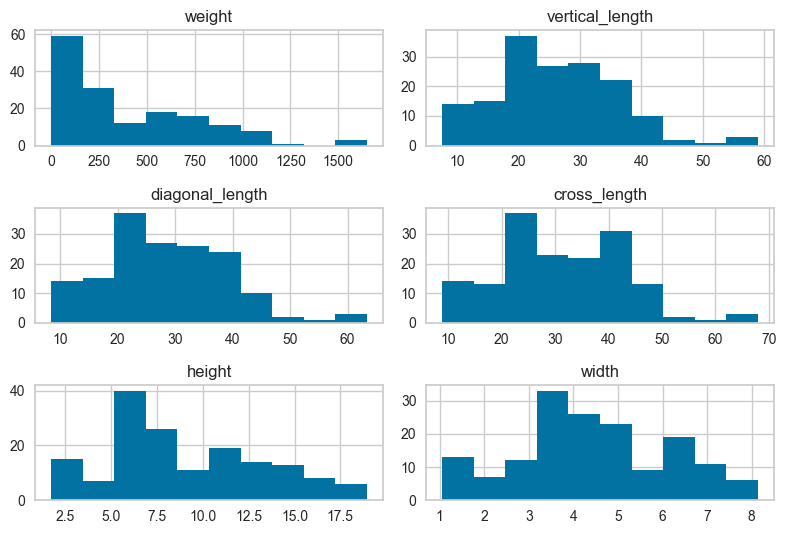

In [9]:
# verificando a distribuição das variáveis numéricas
fig = plt.figure(figsize=(20,5))
num_att.hist()
plt.tight_layout()
plt.plot()

In [10]:
# verificando a frequência da variável target de qualidade
df_raw['species'].value_counts(normalize=True)

Perch        0.358974
Bream        0.224359
Roach        0.128205
Pike         0.089744
Smelt        0.089744
Parkki       0.070513
Whitefish    0.038462
Name: species, dtype: float64

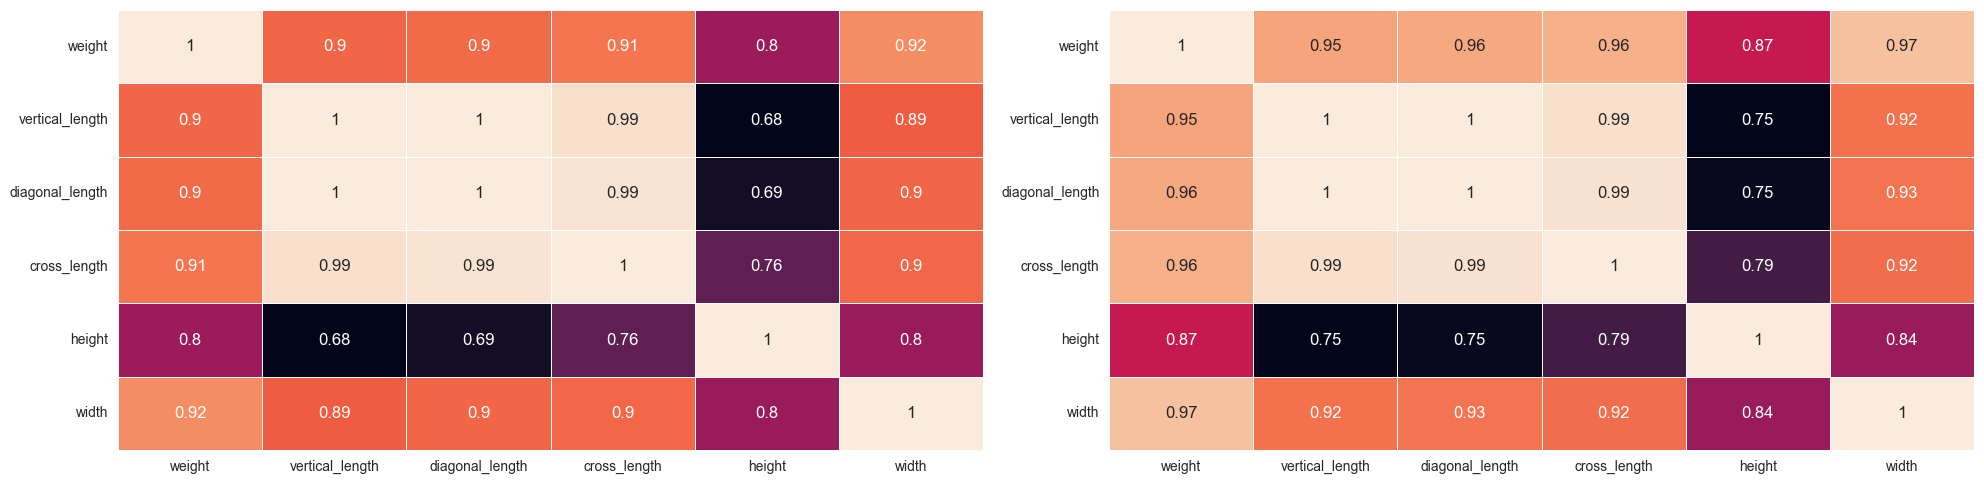

In [11]:
# plotando o heatmap para verificar a dependência das variáveis
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(
    df_raw.corr(method='pearson', numeric_only=True),
    annot=True,
    cbar=False,
    linewidths=0.5
)

plt.subplot(1,2,2)
sns.heatmap(
    df_raw.corr(method='spearman', numeric_only=True),
    annot=True,
    cbar=False,
    linewidths=0.5
)

plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

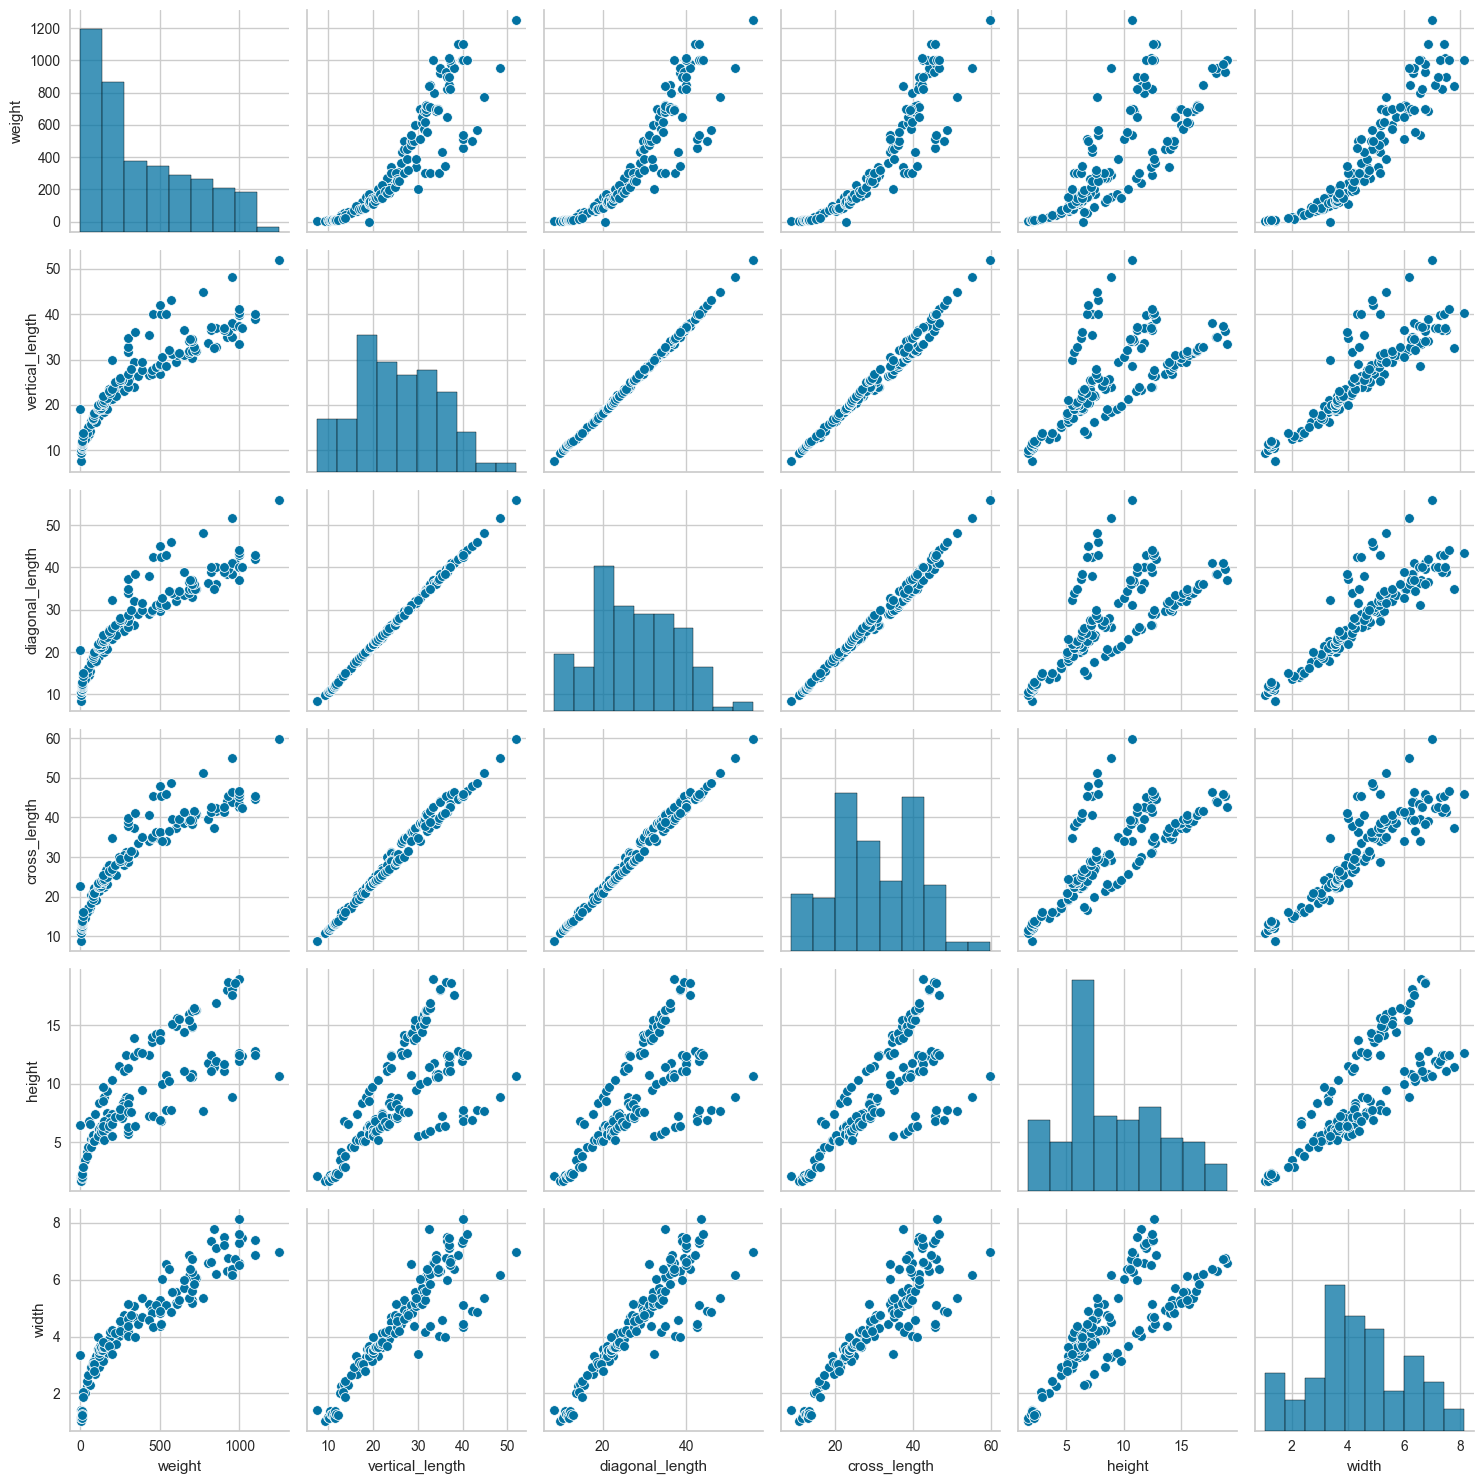

In [12]:
# plotando o pairplot para verificar a dependência das variáveis
fig = plt.figure(figsize=(20,5))

sns.pairplot(df_raw)

plt.tight_layout()
plt.show()

#### Dataframe df_raw

In [13]:
# definição do dataframe df_raw
df_raw.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
# definição das variáveis dependentes e independentes do dataframe df_raw
raw_X = df_raw.drop(columns=['species', 'weight']).copy()
raw_y = df_raw['weight'].copy()
print('Dataframe df_raw ------> Parameters size: {} | reg_target size: {}'.format(len(raw_X), len(raw_y)))

Dataframe df_raw ------> Parameters size: 156 | reg_target size: 156


In [15]:
# criação de dados de treino e teste do dataframe df_raw
raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(
    raw_X,
    raw_y,
    test_size=0.3,
    random_state=42
)
print('Dataframe df_raw ------> X_train size: {} | y_train size: {}'.format(len(raw_X_train), len(raw_y_train)))
print('Dataframe df_raw ------> X_test size: {} | y_test size: {} \n'.format(len(raw_X_test), len(raw_y_test)))

Dataframe df_raw ------> X_train size: 109 | y_train size: 109
Dataframe df_raw ------> X_test size: 47 | y_test size: 47 



#### Dataframe df_total_scaled

In [16]:
# definição do dataframe df_total_scaled a partir do dataframe df_raw
df_total_scaled = df_raw.copy()

In [17]:
# criação dos parâmetros dependentes e independentes do dataframe df_total_scaled 
total_scaled_X = df_total_scaled.drop(columns=['species', 'weight']).copy()
total_scaled_y = df_total_scaled['weight'].copy()
print('Dataframe df_total_scaled ------> Parameters size: {} | reg_target size: {}'.format(len(total_scaled_X), len(total_scaled_y)))

Dataframe df_total_scaled ------> Parameters size: 156 | reg_target size: 156


In [18]:
# criação de dados de treino e teste do dataframe df_raw
total_scaled_X_train, total_scaled_X_test, total_scaled_y_train, total_scaled_y_test = train_test_split(
    total_scaled_X,
    total_scaled_y,
    test_size=0.3
)
print('Dataframe df_total_scaled ------> X_train size: {} | y_train size: {}'.format(len(total_scaled_X_train), len(total_scaled_y_train)))
print('Dataframe df_total_scaled ------> X_test size: {} | y_test size: {} \n'.format(len(total_scaled_X_test), len(total_scaled_y_test)))

Dataframe df_total_scaled ------> X_train size: 109 | y_train size: 109
Dataframe df_total_scaled ------> X_test size: 47 | y_test size: 47 



In [19]:
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in total_scaled_X_train.columns:
    total_scaled_X_train[col] = scaler.fit_transform(total_scaled_X_train[[col]])
    
for col in total_scaled_X_test.columns:
    total_scaled_X_test[col] = scaler.fit_transform(total_scaled_X_test[[col]])

In [20]:
# verificando escalonamento
print('Dataframe total_scaled_X_train:')
for col in total_scaled_X_train.columns:
    print('{} -----> min: {} | max: {}'.format(col, total_scaled_X_train[col].min(), total_scaled_X_train[col].max()))
    
print('\nDataframe total_scaled_X_test:')
for col in total_scaled_X_test.columns:
    print('{} -----> min: {} | max: {}'.format(col, total_scaled_X_test[col].min(), total_scaled_X_test[col].max()))

Dataframe total_scaled_X_train:
vertical_length -----> min: 0.0 | max: 1.0
diagonal_length -----> min: 0.0 | max: 1.0
cross_length -----> min: 0.0 | max: 1.0000000000000002
height -----> min: 0.0 | max: 1.0
width -----> min: 0.0 | max: 1.0

Dataframe total_scaled_X_test:
vertical_length -----> min: 0.0 | max: 1.0000000000000002
diagonal_length -----> min: 0.0 | max: 0.9999999999999999
cross_length -----> min: 0.0 | max: 1.0
height -----> min: 0.0 | max: 0.9999999999999999
width -----> min: 0.0 | max: 1.0


#### Dataframe df_parcial_scaled

In [21]:
# definição do dataframe df_parcial_scaled a partir do dataframe df_raw
df_parcial_scaled = df_raw.copy()

In [22]:
# criação dos parâmetros dependentes e independentes do dataframe df_parcial_scaled
parcial_scaled_X = df_parcial_scaled.drop(columns=['species', 'weight']).copy()
parcial_scaled_y = df_parcial_scaled['weight'].copy()
print('Dataframe df_parcial_scaled ------> Parameters size: {} | reg_target size: {}'.format(len(parcial_scaled_X), len(parcial_scaled_y)))

Dataframe df_parcial_scaled ------> Parameters size: 156 | reg_target size: 156


In [23]:
# criação de dados de treino e teste do dataframe df_raw
parcial_scaled_X_train, parcial_scaled_X_test, parcial_scaled_y_train, parcial_scaled_y_test = train_test_split(
    parcial_scaled_X,
    parcial_scaled_y,
    test_size=0.3,
    random_state=42
)
print('Dataframe df_parcial_scaled ------> X_train size: {} | y_train size: {}'.format(len(parcial_scaled_X_train), len(parcial_scaled_y_train)))
print('Dataframe df_parcial_scaled ------> X_test size: {} | y_test size: {} \n'.format(len(parcial_scaled_X_test), len(parcial_scaled_y_test)))

Dataframe df_parcial_scaled ------> X_train size: 109 | y_train size: 109
Dataframe df_parcial_scaled ------> X_test size: 47 | y_test size: 47 



In [24]:
# definição de listas auxiliares para armazenamento dos valores mínimos e máximos dos parâmetros
cols_max = []
cols_min = []

# identificação e armazenamento dos valores mínimos e máximos dos parâmetros
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    cols_max.append(parcial_scaled_X_train[col].max())
    cols_min.append(parcial_scaled_X_train[col].min())
    
# definição dos valores máximos e mínimos globais
max_ = np.max(cols_max)
min_ = np.min(cols_min)

# escalonamento, do tipo MinMaxScaler, utilizando o máximo e mínimo global do conjunto de dados selecionados
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    parcial_scaled_X_train[col] = parcial_scaled_X_train[col].apply(lambda x:
        (x - min_)/(max_ - min_)
    )
    
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in ['height', 'width']:
    parcial_scaled_X_train[col] = scaler.fit_transform(parcial_scaled_X_train[[col]])

In [25]:
# definição de listas auxiliares para armazenamento dos valores mínimos e máximos dos parâmetros
cols_max = []
cols_min = []

# identificação e armazenamento dos valores mínimos e máximos dos parâmetros
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    cols_max.append(parcial_scaled_X_test[col].max())
    cols_min.append(parcial_scaled_X_test[col].min())
    
# definição dos valores máximos e mínimos globais
max_ = np.max(cols_max)
min_ = np.min(cols_min)

# escalonamento, do tipo MinMaxScaler, utilizando o máximo e mínimo global do conjunto de dados selecionados
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    parcial_scaled_X_test[col] = parcial_scaled_X_test[col].apply(lambda x:
        (x - min_)/(max_ - min_)
    )
    
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in ['height', 'width']:
    parcial_scaled_X_test[col] = scaler.fit_transform(parcial_scaled_X_test[[col]])

In [26]:
# verificando escalonamento
print('Dataframe total_scaled_X_train:')
for col in raw_X_train.columns:
    print('{} -----> min: {} | max: {}'.format(col, parcial_scaled_X_train[col].min(), parcial_scaled_X_train[col].max()))
    
print('\nDataframe total_scaled_X_test:')
for col in raw_X_test.columns:
    print('{} -----> min: {} | max: {}'.format(col, parcial_scaled_X_test[col].min(), parcial_scaled_X_test[col].max()))

Dataframe total_scaled_X_train:
vertical_length -----> min: 0.0 | max: 0.8524904214559387
diagonal_length -----> min: 0.017241379310344834 | max: 0.9291187739463601
cross_length -----> min: 0.024904214559386986 | max: 1.0
height -----> min: 0.0 | max: 1.0
width -----> min: 0.0 | max: 1.0

Dataframe total_scaled_X_test:
vertical_length -----> min: 0.0 | max: 0.8415841584158414
diagonal_length -----> min: 0.012376237623762375 | max: 0.9207920792079207
cross_length -----> min: 0.044554455445544525 | max: 1.0
height -----> min: 0.0 | max: 1.0000000000000002
width -----> min: 0.0 | max: 0.9999999999999999


#### Dataframe df_dummies

In [27]:
# definição do dataframe df_dummies
df_dummies = df_raw.copy()

# criação de parâmetros dummy
df_dummies['dummy1'] = np.random.uniform(1.0, 10.0, df_dummies.shape[0])
df_dummies['dummy2'] = np.random.uniform(1.0, 10.0, df_dummies.shape[0])
df_dummies['dummy3'] = np.random.uniform(1.0, 10.0, df_dummies.shape[0])

df_dummies.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width,dummy1,dummy2,dummy3
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,8.996213,7.526257,1.181751
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,8.389929,7.348769,6.692173
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,6.615403,1.551879,7.209500
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,9.718482,3.033311,5.456004
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,8.673047,7.921971,8.041472


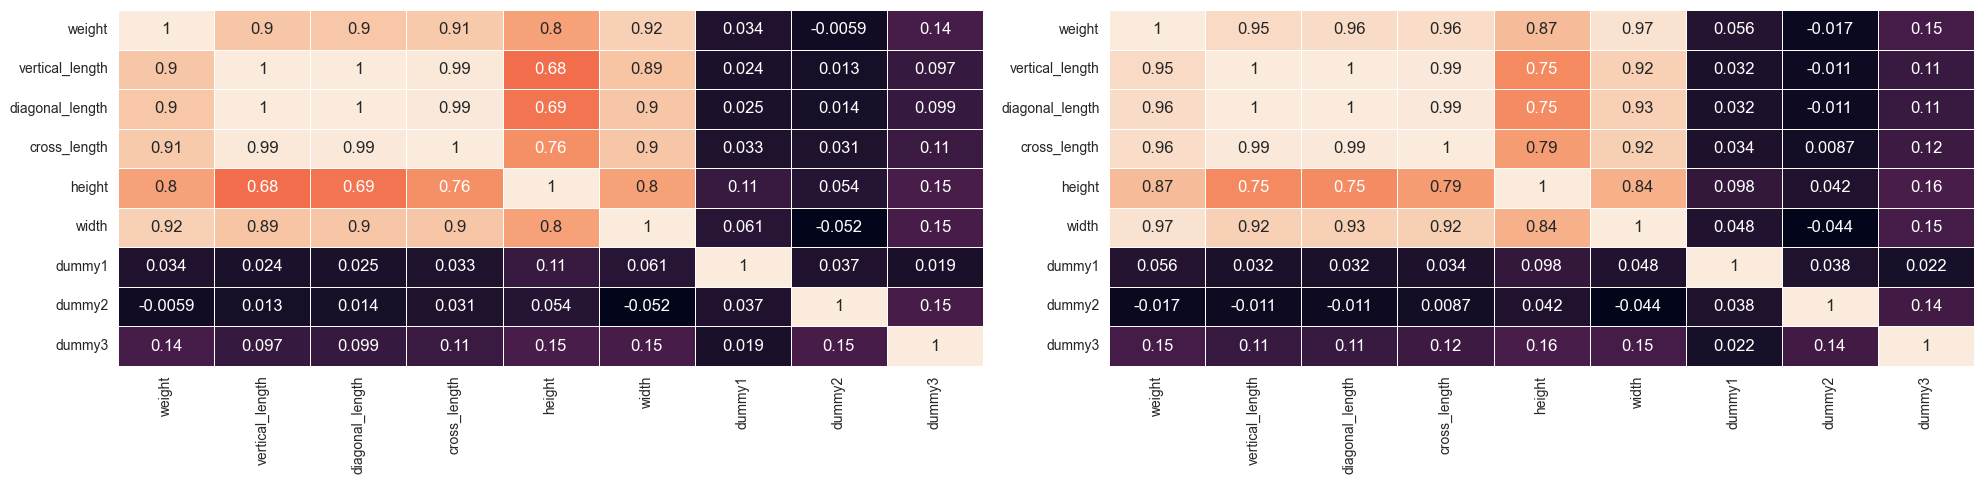

In [28]:
# plotando o heatmap para verificar a dependência das variáveis
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(
    df_dummies.corr(method='pearson', numeric_only=True),
    annot=True,
    cbar=False,
    linewidths=0.5
)

plt.subplot(1,2,2)
sns.heatmap(
    df_dummies.corr(method='spearman', numeric_only=True),
    annot=True,
    cbar=False,
    linewidths=0.5
)

plt.tight_layout()
plt.show()

In [29]:
# definição das variáveis dependentes e independentes do dataframe df_dummies
dummies_X = df_dummies.drop(columns=['species', 'weight']).copy()
dummies_y = df_dummies['weight'].copy()
print('Dataframe df_dummies ------> Parameters size: {} | reg_target size: {}'.format(len(dummies_X), len(dummies_y)))

Dataframe df_dummies ------> Parameters size: 156 | reg_target size: 156


In [30]:
# criação de dados de treino e teste do dataframe df_dummies
dummies_X_train, dummies_X_test, dummies_y_train, dummies_y_test = train_test_split(
    dummies_X,
    dummies_y,
    test_size=0.3,
    random_state=42
)
print('Dataframe df_dummies ------> X_train size: {} | y_train size: {}'.format(len(dummies_X_train), len(dummies_y_train)))
print('Dataframe df_dummies ------> X_test size: {} | y_test size: {} \n'.format(len(dummies_X_test), len(dummies_y_test)))

Dataframe df_dummies ------> X_train size: 109 | y_train size: 109
Dataframe df_dummies ------> X_test size: 47 | y_test size: 47 



#### Dataframe df_pca

In [31]:
# criação de embedding
pca = PCA(n_components=0.99)
df_pca = pd.DataFrame(pca.fit_transform(df_raw.drop(columns=['weight', 'species'])))

# verificando a explicabilidade da variável criada
print(pca.explained_variance_ratio_)

[0.96652556 0.03101782]


In [32]:
# renomeando as variáveis de embbeding
df_pca.columns = ['pca1', 'pca2']

# trazendo os parâmetros categórico e target do dataframe df_raw
df_pca['species'] = df_raw['species']
df_pca['weight'] = df_raw['weight']

df_pca.head()

,pca1,pca2,species,weight
0,-2.525697,-3.407077,Bream,242.0
1,-0.670704,-4.077159,Bream,290.0
2,-0.656804,-3.995933,Bream,340.0
3,3.504756,-3.443057,Bream,363.0
4,3.921483,-3.249400,Bream,430.0


In [33]:
# definição das variáveis dependentes e independentes do dataframe df_pca
pca_X = df_pca.drop(columns=['species', 'weight']).copy()
pca_y = df_pca['weight'].copy()
print('Dataframe df_pca ------> Parameters size: {} | reg_target size: {}'.format(len(pca_X), len(pca_y)))

Dataframe df_pca ------> Parameters size: 156 | reg_target size: 156


In [34]:
# criação de dados de treino e teste do dataframe df_pca
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(
    pca_X,
    pca_y,
    test_size=0.3,
    random_state=42
)
print('Dataframe df_pca ------> X_train size: {} | y_train size: {}'.format(len(pca_X_train), len(pca_y_train)))
print('Dataframe df_pca ------> X_test size: {} | y_test size: {} \n'.format(len(pca_X_test), len(pca_y_test)))

Dataframe df_pca ------> X_train size: 109 | y_train size: 109
Dataframe df_pca ------> X_test size: 47 | y_test size: 47 



# 1.1.1 LINEAR REGRESSION

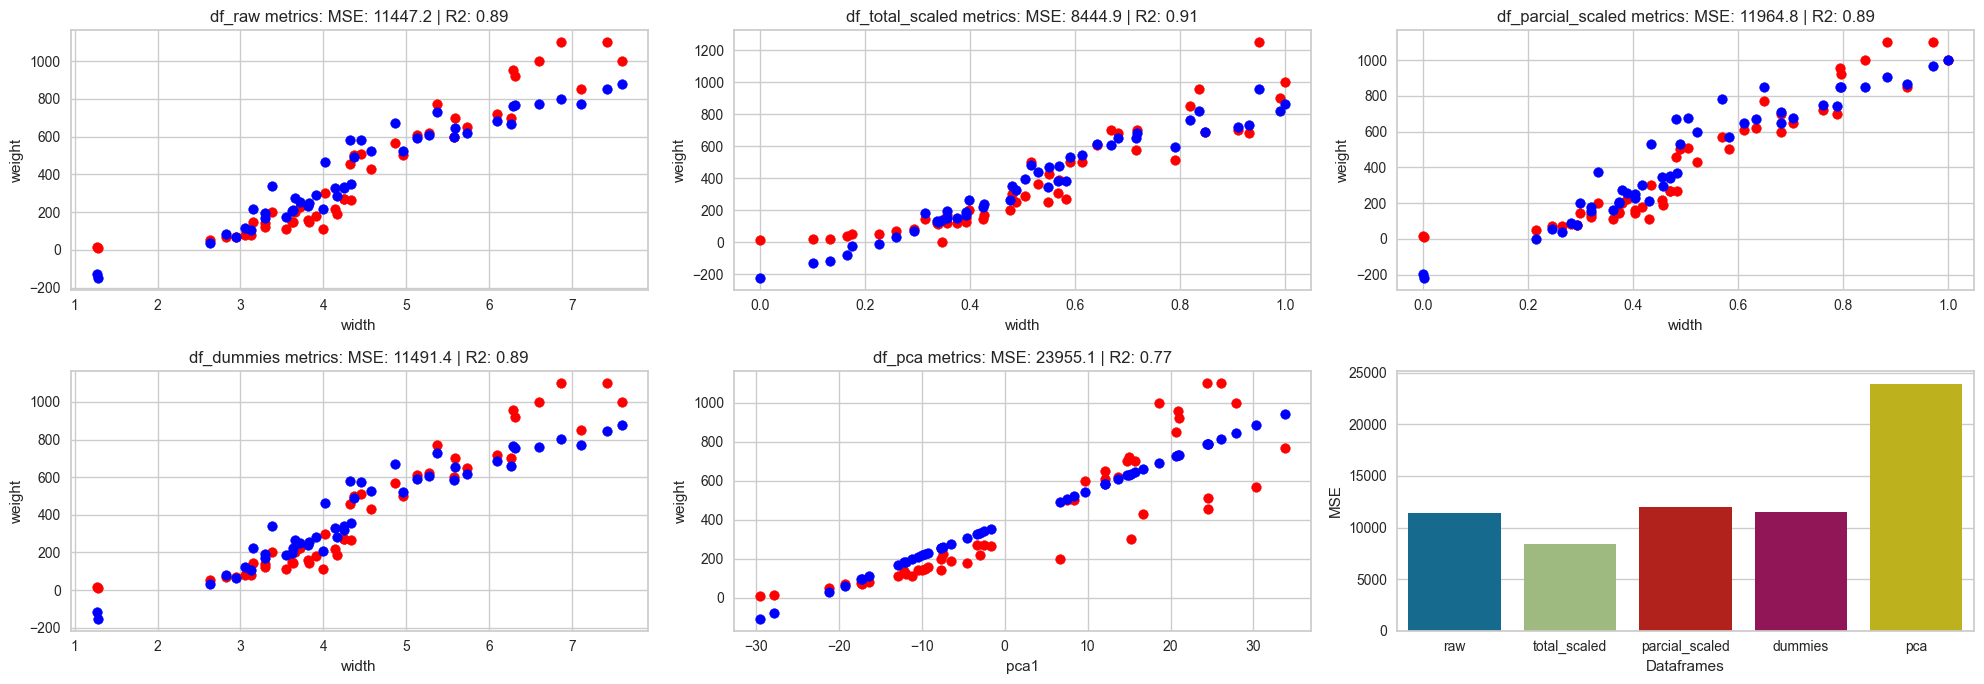

In [35]:
fig = plt.figure(figsize=(20,7))

plt.subplot(2, 3, 1)
raw_linear_reg, raw_linear_predictions, raw_linear_reg_mse, raw_linear_reg_r2 = fit_model(
    model=linear_model.LinearRegression(positive=True),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_linear_reg, total_scaled_linear_predictions, total_scaled_linear_reg_mse, total_scaled_linear_reg_r2 = fit_model(
    model=linear_model.LinearRegression(positive=True),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_linear_reg, parcial_scaled_linear_predictions, parcial_scaled_linear_reg_mse, parcial_scaled_linear_reg_r2 = fit_model(
    model=linear_model.LinearRegression(positive=True),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_linear_reg, dummies_linear_predictions, dummies_linear_reg_mse, dummies_linear_reg_r2 = fit_model(
    model=linear_model.LinearRegression(positive=True),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_linear_reg, pca_linear_predictions, pca_linear_reg_mse, pca_linear_reg_r2 = fit_model(
    model=linear_model.LinearRegression(positive=True),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_linear_reg_mse, total_scaled_linear_reg_mse, parcial_scaled_linear_reg_mse, dummies_linear_reg_mse, pca_linear_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.2 RIDGE

## 1.1.2.1 Ridge Regresssion

In [36]:
n_list = np.arange(0.5, 50, 0.5)

# buscando a otimização do parâmetro alpha a partir do cross-validation
raw_ridgeCV = linear_model.RidgeCV(alphas=n_list)
total_scaled_ridgeCV = linear_model.RidgeCV(alphas=n_list)
parcial_scaled_ridgeCV = linear_model.RidgeCV(alphas=n_list)
dummies_ridgeCV = linear_model.RidgeCV(alphas=n_list)
pca_ridgeCV = linear_model.RidgeCV(alphas=n_list)

# realizando o o treinamento para obtenção do valor ótimo para alpha
raw_ridgeCV.fit(
    raw_X_test,
    raw_y_test
)
total_scaled_ridgeCV.fit(
    total_scaled_X_test,
    total_scaled_y_test
)
parcial_scaled_ridgeCV.fit(
    parcial_scaled_X_test,
    parcial_scaled_y_test
)
dummies_ridgeCV.fit(
    dummies_X_test,
    dummies_y_test
)
pca_ridgeCV.fit(
    pca_X_test,
    pca_y_test
)

# imprimindo métricas associadas ao cross-validation
print('Dataframe RAW ---> Alpha: {}'.format(raw_ridgeCV.alpha_))
print('Dataframe TOTAL SCALED ---> Alpha: {}'.format(total_scaled_ridgeCV.alpha_))
print('Dataframe PARCIAL SCALED ---> Alpha: {}'.format(parcial_scaled_ridgeCV.alpha_))
print('Dataframe DUMMIES ---> Alpha: {}'.format(dummies_ridgeCV.alpha_))
print('Dataframe PCA ---> Alpha: {}'.format(pca_ridgeCV.alpha_))

Dataframe RAW ---> Alpha: 4.0
Dataframe TOTAL SCALED ---> Alpha: 0.5
Dataframe PARCIAL SCALED ---> Alpha: 0.5
Dataframe DUMMIES ---> Alpha: 3.5
Dataframe PCA ---> Alpha: 3.0


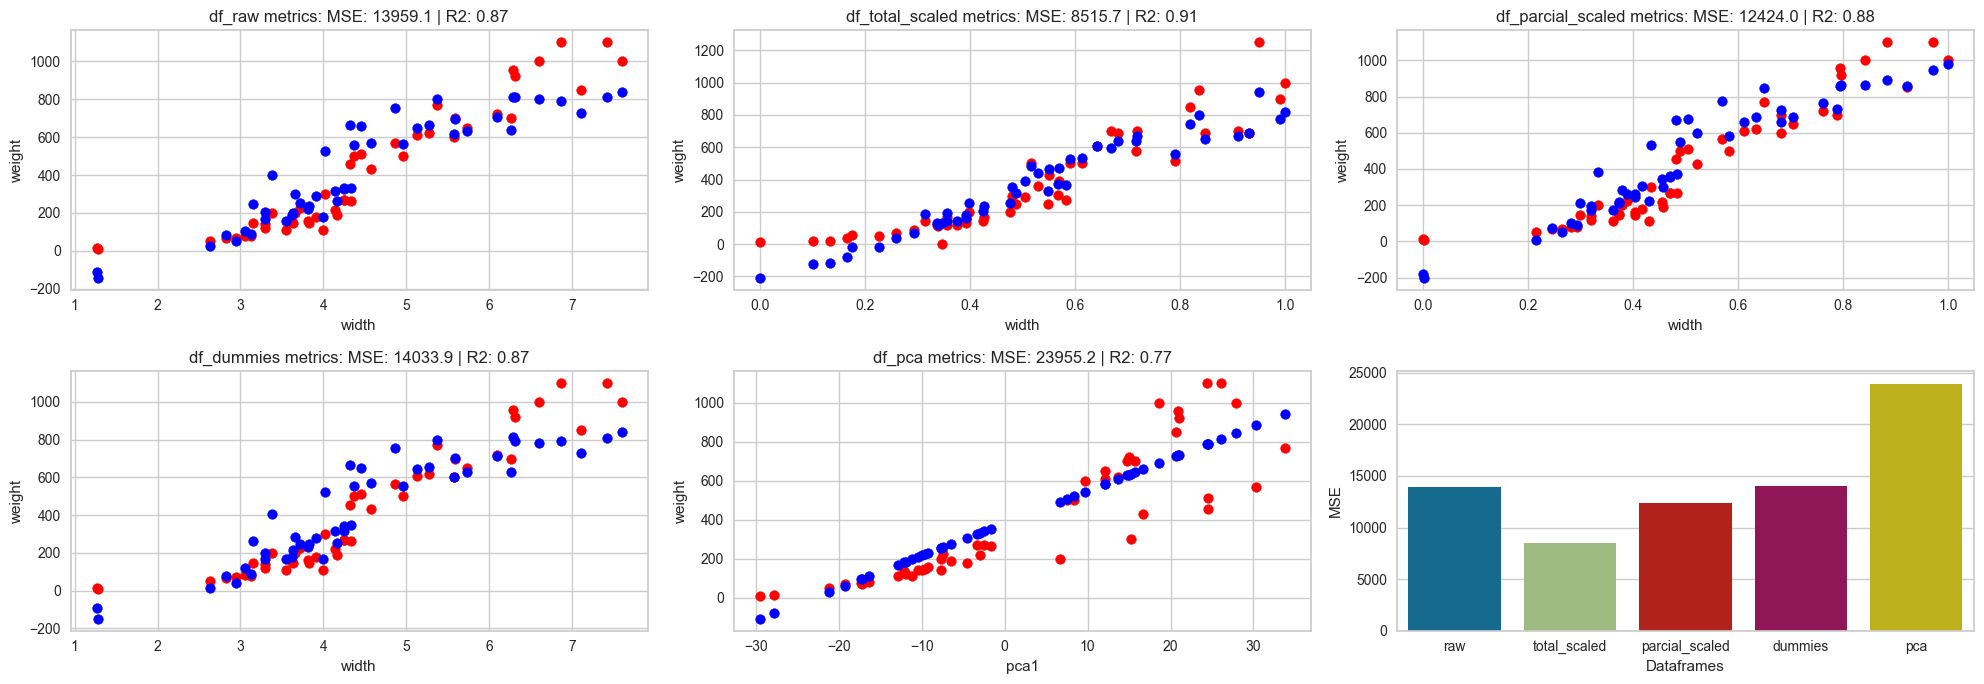

In [37]:
fig = plt.figure(figsize=(20,7))

plt.subplot(2, 3, 1)
raw_ridge_reg, raw_ridge_predictions, raw_ridge_reg_mse, raw_ridge_reg_r2 = fit_model(
    model=linear_model.Ridge(alpha=4, positive=True),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_ridge_reg, total_scaled_ridge_predictions, total_scaled_ridge_reg_mse, total_scaled_ridge_reg_r2 = fit_model(
    model=linear_model.Ridge(alpha=0.5, positive=True),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_ridge_reg, parcial_scaled_ridge_predictions, parcial_scaled_ridge_reg_mse, parcial_scaled_ridge_reg_r2 = fit_model(
    model=linear_model.Ridge(alpha=0.5, positive=True),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_ridge_reg, dummies_ridge_predictions, dummies_ridge_reg_mse, dummies_ridge_reg_r2 = fit_model(
    model=linear_model.Ridge(alpha=4, positive=True),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_ridge_reg, pca_ridge_predictions, pca_ridge_reg_mse, pca_ridge_reg_r2 = fit_model(
    model=linear_model.Ridge(alpha=3, positive=True),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_ridge_reg_mse, total_scaled_ridge_reg_mse, parcial_scaled_ridge_reg_mse, dummies_ridge_reg_mse, pca_ridge_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

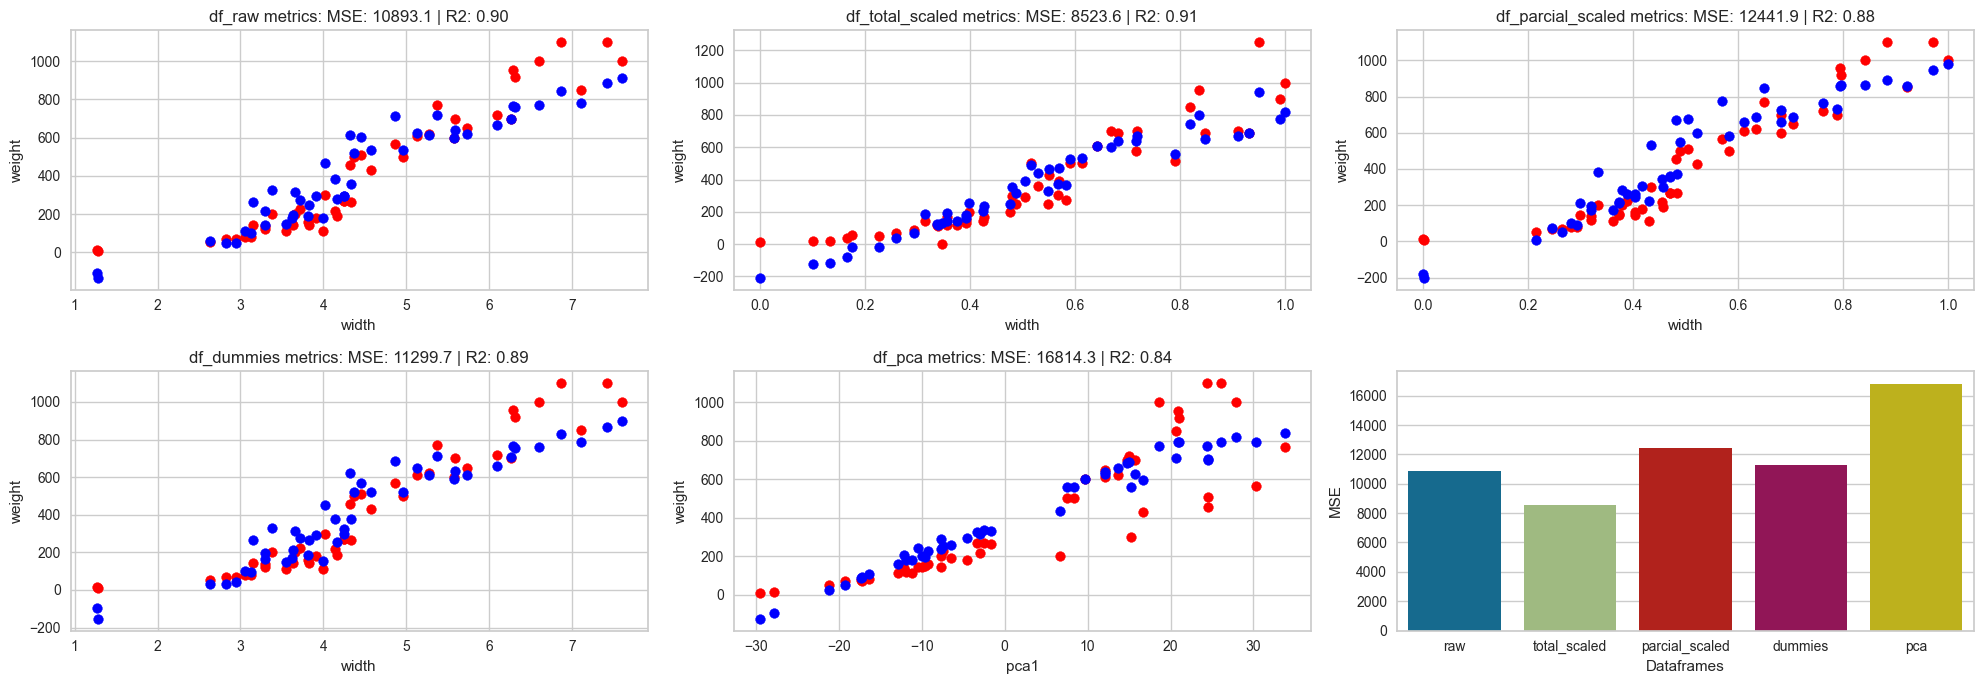

In [38]:
n_list = np.arange(0.5, 50, 0.5)
fig = plt.figure(figsize=(20,7))

plt.subplot(2, 3, 1)
raw_ridgecv_reg, raw_ridgecv_predictions, raw_ridgecv_reg_mse, raw_ridgecv_reg_r2 = fit_model(
    model=linear_model.RidgeCV(alphas=n_list),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_ridgecv_reg, total_scaled_ridgecv_predictions, total_scaled_ridgecv_reg_mse, total_scaled_ridgecv_reg_r2 = fit_model(
    model=linear_model.RidgeCV(alphas=n_list),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_ridgecv_reg, parcial_scaled_ridgecv_predictions, parcial_scaled_ridgecv_reg_mse, parcial_scaled_ridgecv_reg_r2 = fit_model(
    model=linear_model.RidgeCV(alphas=n_list),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_ridgecv_reg, dummies_ridgecv_predictions, dummies_ridgecv_reg_mse, dummies_ridgecv_reg_r2 = fit_model(
    model=linear_model.RidgeCV(alphas=n_list),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_ridgecv_reg, pca_ridgecv_predictions, pca_ridgecv_reg_mse, pca_ridgecv_reg_r2 = fit_model(
    model=linear_model.RidgeCV(alphas=n_list),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_ridgecv_reg_mse, total_scaled_ridgecv_reg_mse, parcial_scaled_ridgecv_reg_mse, dummies_ridgecv_reg_mse, pca_ridgecv_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

## 1.1.2.2 Ridge Classification

### 1.1.2.2.1 Preparação dos datasets

In [39]:
# definição do dataframe df_raw_class
df_raw_class = df_raw[df_raw['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_raw
raw_class_X = df_raw_class.drop(columns=['species']).copy()
raw_class_y = df_raw_class['species'].copy()

# criação de dados de treino e teste do dataframe df_raw
raw_class_X_train, raw_class_X_test, raw_class_y_train, raw_class_y_test = train_test_split(
    raw_class_X,
    raw_class_y,
    test_size=0.3,
    random_state=42
)

In [40]:
# definição do dataframe df_total_scaled_class
df_total_scaled_class = df_total_scaled[df_total_scaled['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_total_scaled
total_scaled_class_X = df_total_scaled_class.drop(columns=['species']).copy()
total_scaled_class_y = df_total_scaled_class['species'].copy()

# criação de dados de treino e teste do dataframe df_total_scaled
total_scaled_class_X_train, total_scaled_class_X_test, total_scaled_class_y_train, total_scaled_class_y_test = train_test_split(
    total_scaled_class_X,
    total_scaled_class_y,
    test_size=0.3,
    random_state=42
)

# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in total_scaled_class_X_train.columns:
    total_scaled_class_X_train[col] = scaler.fit_transform(total_scaled_class_X_train[[col]])
    
for col in total_scaled_class_X_test.columns:
    total_scaled_class_X_test[col] = scaler.fit_transform(total_scaled_class_X_test[[col]])

In [41]:
# definição do dataframe df_parcial_scaled_class
df_parcial_scaled_class = df_parcial_scaled[df_parcial_scaled['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_parcial_scaled
parcial_scaled_class_X = df_parcial_scaled_class.drop(columns=['species']).copy()
parcial_scaled_class_y = df_parcial_scaled_class['species'].copy()

# criação de dados de treino e teste do dataframe df_parcial_scaled
parcial_scaled_class_X_train, parcial_scaled_class_X_test, parcial_scaled_class_y_train, parcial_scaled_class_y_test = train_test_split(
    parcial_scaled_class_X,
    parcial_scaled_class_y,
    test_size=0.3,
    random_state=42
)

# definição de listas auxiliares para armazenamento dos valores mínimos e máximos dos parâmetros
cols_max = []
cols_min = []

# identificação e armazenamento dos valores mínimos e máximos dos parâmetros
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    cols_max.append(parcial_scaled_class_X_train[col].max())
    cols_min.append(parcial_scaled_class_X_train[col].min())
    
# definição dos valores máximos e mínimos globais
max_ = np.max(cols_max)
min_ = np.min(cols_min)

# escalonamento, do tipo MinMaxScaler, utilizando o máximo e mínimo global do conjunto de dados selecionados
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    parcial_scaled_class_X_train[col] = parcial_scaled_class_X_train[col].apply(lambda x:
        (x - min_)/(max_ - min_)
    )
    
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in ['height', 'width', 'weight']:
    parcial_scaled_class_X_train[col] = scaler.fit_transform(parcial_scaled_class_X_train[[col]])
    
# definição de listas auxiliares para armazenamento dos valores mínimos e máximos dos parâmetros
cols_max = []
cols_min = []

# identificação e armazenamento dos valores mínimos e máximos dos parâmetros
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    cols_max.append(parcial_scaled_class_X_test[col].max())
    cols_min.append(parcial_scaled_class_X_test[col].min())
    
# definição dos valores máximos e mínimos globais
max_ = np.max(cols_max)
min_ = np.min(cols_min)

# escalonamento, do tipo MinMaxScaler, utilizando o máximo e mínimo global do conjunto de dados selecionados
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    parcial_scaled_class_X_test[col] = parcial_scaled_class_X_test[col].apply(lambda x:
        (x - min_)/(max_ - min_)
    )
    
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in ['height', 'width', 'weight']:
    parcial_scaled_class_X_test[col] = scaler.fit_transform(parcial_scaled_class_X_test[[col]])

In [42]:
# definição do dataframe df_dummies_class
df_dummies_class = df_dummies[df_dummies['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_dummies
dummies_class_X = df_dummies_class.drop(columns=['species']).copy()
dummies_class_y = df_dummies_class['species'].copy()

# criação de dados de treino e teste do dataframe df_dummies
dummies_class_X_train, dummies_class_X_test, dummies_class_y_train, dummies_class_y_test = train_test_split(
    dummies_class_X,
    dummies_class_y,
    test_size=0.3,
    random_state=42
)

In [43]:
# criação de embedding
pca = PCA(n_components=0.99)
df_pca_class = pd.DataFrame(pca.fit_transform(df_raw_class.drop(columns=['species'])))

# renomeando as variáveis de embbeding
df_pca_class.columns = ['pca1']

# trazendo os parâmetros categórico e target do dataframe df_raw
df_pca_class['species'] = df_raw_class['species']

# definição das variáveis dependentes e independentes do dataframe df_pca
pca_class_X = df_pca_class.drop(columns=['species']).copy()
pca_class_y = df_pca_class['species'].copy()

# criação de dados de treino e teste do dataframe df_pca
pca_class_X_train, pca_class_X_test, pca_class_y_train, pca_class_y_test = train_test_split(
    pca_class_X,
    pca_class_y,
    test_size=0.3,
    random_state=42
)

### 1.1.2.2.2 Classificação

In [44]:
ridgeclass_dict = {
    'RAW': [raw_class_X_train, raw_class_y_train, raw_class_X_test, raw_class_y_test, 4],
    'TOTAL SCALED': [total_scaled_class_X_train, total_scaled_class_y_train, total_scaled_class_X_test, total_scaled_class_y_test, 0.5],
    'PARCIAL SCALED': [parcial_scaled_class_X_train, parcial_scaled_class_y_train, parcial_scaled_class_X_test, parcial_scaled_class_y_test, 0.5],
    'DUMMIES': [dummies_class_X_train, dummies_class_y_train, dummies_class_X_test, dummies_class_y_test, 5],
    'PCA': [pca_class_X_train, pca_class_y_train, pca_class_X_test, pca_class_y_test, 3]
}

for i in ridgeclass_dict.keys():
    
    # definindo o modelo de regressão Ridge
    ridgeclass = linear_model.RidgeClassifier(alpha=ridgeclass_dict[i][4])
    
    # realizando o treinamento para criação do modelo
    ridgeclass.fit(
        ridgeclass_dict[i][0],
        ridgeclass_dict[i][1]
    )
    
    # realizando a predição do dataframe de teste a partir do modelo treinado
    ridgeclass_pred = ridgeclass.predict(ridgeclass_dict[i][2])
    
    # imprimindo métricas associadas ao modelo
    print('\n Dataframe {}'.format(i))
    print('Accuracy: {}'.format(accuracy_score(ridgeclass_dict[i][3], ridgeclass_pred)))
    print(confusion_matrix(ridgeclass_dict[i][3], ridgeclass_pred))


 Dataframe RAW
Accuracy: 1.0
[[12  0]
 [ 0 16]]

 Dataframe TOTAL SCALED
Accuracy: 1.0
[[12  0]
 [ 0 16]]

 Dataframe PARCIAL SCALED
Accuracy: 1.0
[[12  0]
 [ 0 16]]

 Dataframe DUMMIES
Accuracy: 1.0
[[12  0]
 [ 0 16]]

 Dataframe PCA
Accuracy: 0.6071428571428571
[[ 3  9]
 [ 2 14]]


# 1.1.3 LASSO

In [45]:
n_list = np.arange(0.5, 150, 0.5)

# buscando a otimização do parâmetro alpha a partir do cross-validation
raw_lassoCV = linear_model.LassoCV(alphas=n_list)
total_scaled_lassoCV = linear_model.LassoCV(alphas=n_list)
parcial_scaled_lassoCV = linear_model.LassoCV(alphas=n_list)
dummies_lassoCV = linear_model.LassoCV(alphas=n_list)
pca_lassoCV = linear_model.LassoCV(alphas=n_list)

# realizando o o treinamento para obtenção do valor ótimo para alpha
raw_lassoCV.fit(
    raw_X_test,
    raw_y_test
)
total_scaled_lassoCV.fit(
    total_scaled_X_test,
    total_scaled_y_test
)
parcial_scaled_lassoCV.fit(
    parcial_scaled_X_test,
    parcial_scaled_y_test
)
dummies_lassoCV.fit(
    dummies_X_test,
    dummies_y_test
)
pca_lassoCV.fit(
    pca_X_test,
    pca_y_test
)

# imprimindo métricas associadas ao cross-validation
print('Dataframe RAW ---> Alpha: {}'.format(raw_lassoCV.alpha_))
print('Dataframe TOTAL SCALED ---> Alpha: {}'.format(total_scaled_lassoCV.alpha_))
print('Dataframe PARCIAL SCALED ---> Alpha: {}'.format(parcial_scaled_lassoCV.alpha_))
print('Dataframe DUMMIES ---> Alpha: {}'.format(dummies_lassoCV.alpha_))
print('Dataframe PCA ---> Alpha: {}'.format(pca_lassoCV.alpha_))

Dataframe RAW ---> Alpha: 2.0
Dataframe TOTAL SCALED ---> Alpha: 0.5
Dataframe PARCIAL SCALED ---> Alpha: 0.5
Dataframe DUMMIES ---> Alpha: 1.5
Dataframe PCA ---> Alpha: 0.5


/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403.4143016373273, tolerance: 394.85967389189193
  model = cd_fast.enet_coordinate_descent_gram(
/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.23391482658917, tolerance: 394.85967389189193
  model = cd_fast.enet_coordinate_descent_gram(
/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4636.221892278234, tolerance: 394.85967389189193
  mode

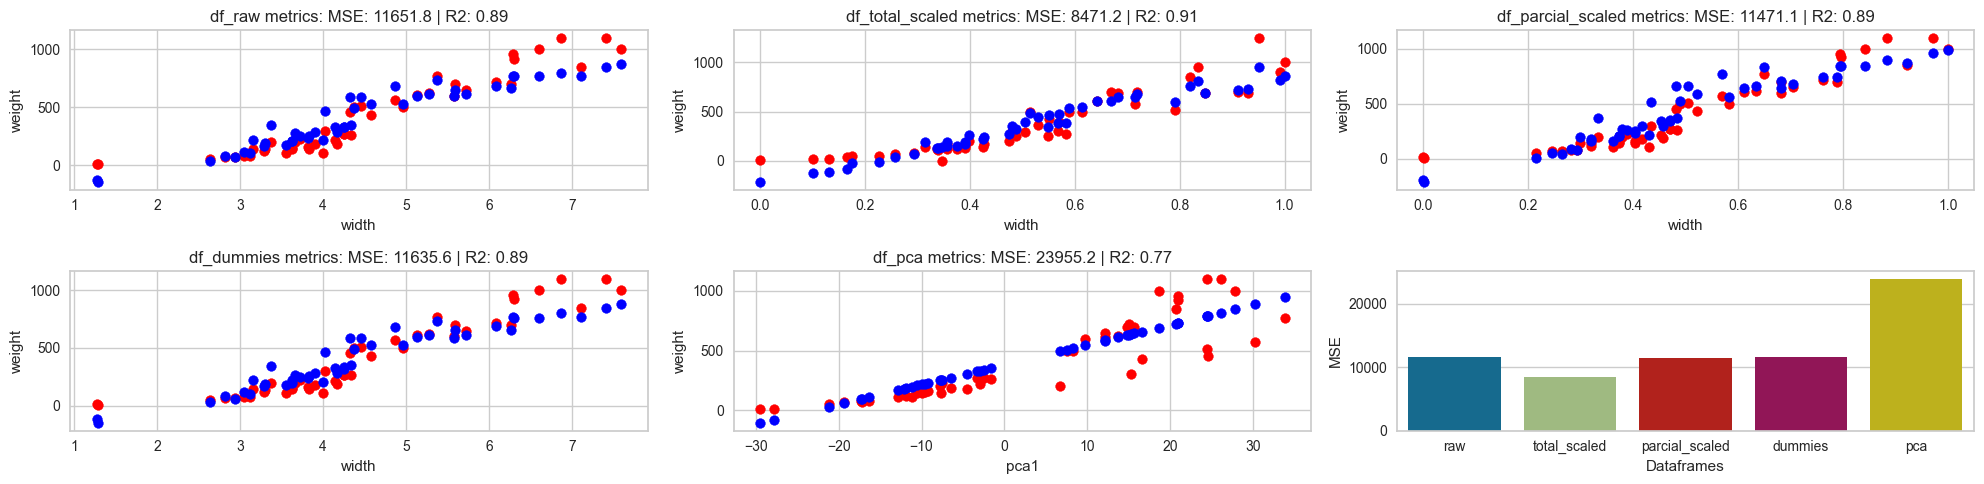

In [46]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_lasso_reg, raw_lasso_predictions, raw_lasso_reg_mse, raw_lasso_reg_r2 = fit_model(
    model=linear_model.Lasso(alpha=2, positive=True),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_lasso_reg, total_scaled_lasso_predictions, total_scaled_lasso_reg_mse, total_scaled_lasso_reg_r2 = fit_model(
    model=linear_model.Lasso(alpha=0.5, positive=True),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_lasso_reg, parcial_scaled_lasso_predictions, parcial_scaled_lasso_reg_mse, parcial_scaled_lasso_reg_r2 = fit_model(
    model=linear_model.Lasso(alpha=0.5, positive=True),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_lasso_reg, dummies_lasso_predictions, dummies_lasso_reg_mse, dummies_lasso_reg_r2 = fit_model(
    model=linear_model.Lasso(alpha=1.5, positive=True),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_lasso_reg, pca_lasso_predictions, pca_lasso_reg_mse, pca_lasso_reg_r2 = fit_model(
    model=linear_model.Lasso(alpha=0.5, positive=True),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_lasso_reg_mse, total_scaled_lasso_reg_mse, parcial_scaled_lasso_reg_mse, dummies_lasso_reg_mse, pca_lasso_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14210.125753310043, tolerance: 799.0297753333332
  model = cd_fast.enet_coordinate_descent_gram(
/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141666.11656786728, tolerance: 799.0297753333332
  model = cd_fast.enet_coordinate_descent_gram(
/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2031.5489723698702, tolerance: 832.5670678160919
  model

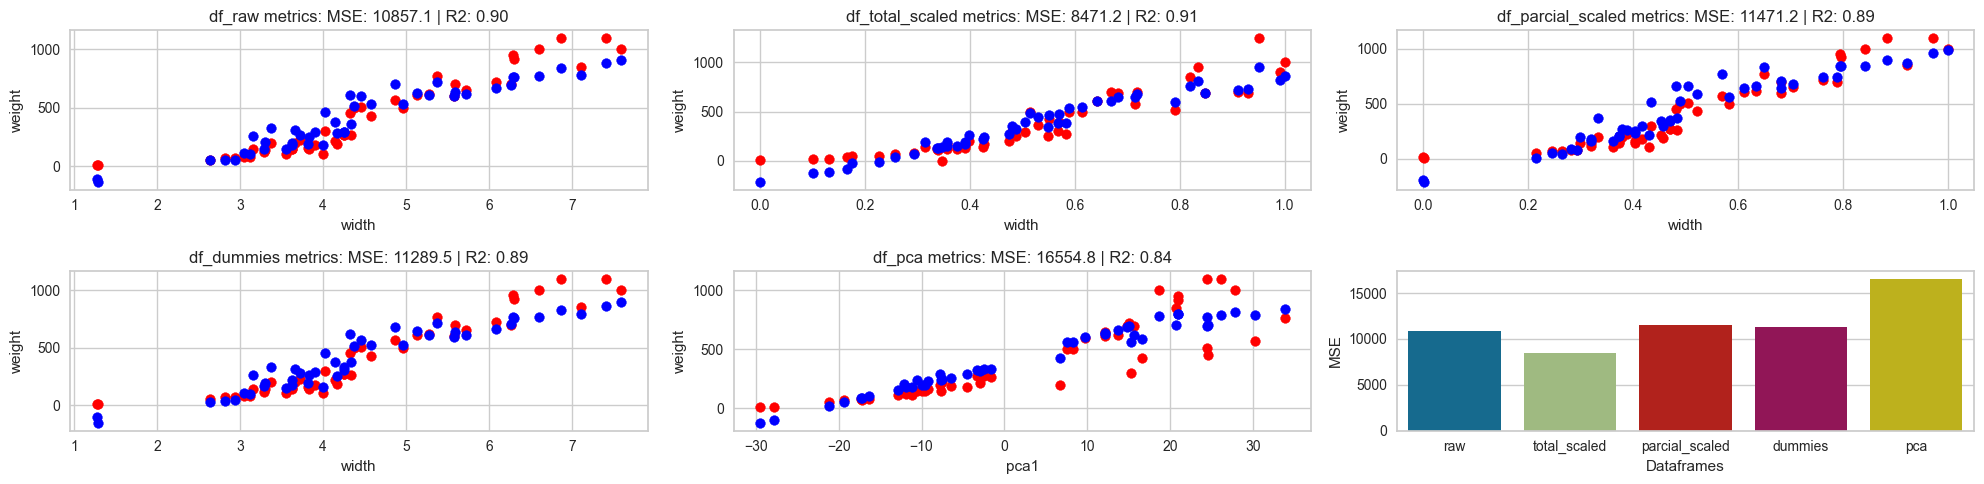

In [47]:
n_list = np.arange(0.5, 150, 0.5)
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_lassocv_reg, raw_lassocv_predictions, raw_lassocv_reg_mse, raw_lassocv_reg_r2 = fit_model(
    model=linear_model.LassoCV(alphas=n_list),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_lassocv_reg, total_scaled_lassocv_predictions, total_scaled_lassocv_reg_mse, total_scaled_lassocv_reg_r2 = fit_model(
    model=linear_model.LassoCV(alphas=n_list),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_lassocv_reg, parcial_scaled_lassocv_predictions, parcial_scaled_lassocv_reg_mse, parcial_scaled_lassocv_reg_r2 = fit_model(
    model=linear_model.LassoCV(alphas=n_list),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_lassocv_reg, dummies_lassocv_predictions, dummies_lassocv_reg_mse, dummies_lassocv_reg_r2 = fit_model(
    model=linear_model.LassoCV(alphas=n_list),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_lassocv_reg, pca_lassocv_predictions, pca_lassocv_reg_mse, pca_lassocv_reg_r2 = fit_model(
    model=linear_model.LassoCV(alphas=n_list),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_lassocv_reg_mse, total_scaled_lassocv_reg_mse, parcial_scaled_lassocv_reg_mse, dummies_lassocv_reg_mse, pca_lassocv_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.4 MULTI-TASK LASSO

In [48]:
# definição do dataframe df_dummies_multitask
df_dummies_multitask = df_dummies.copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_dummies_multitask
dummies_multitask_X = df_dummies_multitask.drop(columns=['height', 'weight', 'species']).copy()
dummies_multitask_y = df_dummies_multitask[['height', 'weight']].copy()

# criação de dados de treino e teste do dataframe df_dummies_multitask
dummies_multitask_X_train, dummies_multitask_X_test, dummies_multitask_y_train, dummies_multitask_y_test = train_test_split(
    dummies_multitask_X,
    dummies_multitask_y,
    test_size=0.3,
    random_state=42
)

/Users/neusmarcordeiro/.pyenv/versions/3.8.10/envs/envDump/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:2403: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5366.426729783416, tolerance: 1082.3964467538897
  ) = cd_fast.enet_coordinate_descent_multi_task(


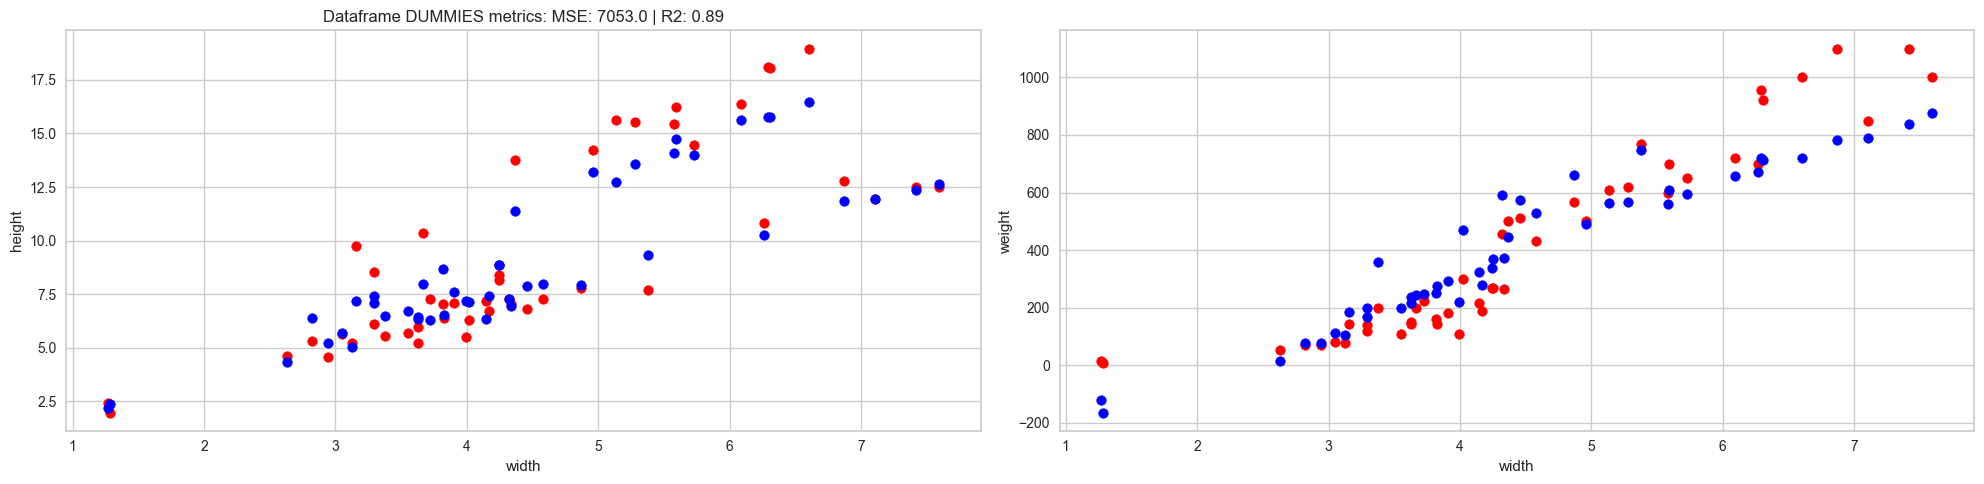

In [49]:
# definindo os modelos de regressão linear
lasso_multitask = linear_model.MultiTaskLasso(alpha=1.5)

# realizando o treinamento para criação dos modelos
lasso_multitask.fit(dummies_multitask_X_train, dummies_multitask_y_train)

# realizando a predição do dataframe de teste a partir do modelo treinado
predictions_lasso_multitask = lasso_multitask.predict(dummies_multitask_X_test)
df_predictions_lasso_multitask = pd.DataFrame(predictions_lasso_multitask, columns=['height', 'weight'])

# imprimindo métricas associadas ao modelo
mse_lasso_multitask = mean_squared_error(dummies_multitask_y_test, predictions_lasso_multitask)
r2_lasso_multitask = r2_score(dummies_multitask_y_test, predictions_lasso_multitask)

# criando visualização dos ajustes para avaliação visual
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(dummies_multitask_X_test['width'], dummies_multitask_y_test['height'], color='red')
plt.scatter(dummies_multitask_X_test['width'], df_predictions_lasso_multitask['height'], color='blue')
plt.xlabel('width')
plt.ylabel('height')
plt.title('{} metrics: MSE: {:.1f} | R2: {:.2f}'.format('Dataframe DUMMIES', mse_lasso_multitask, r2_lasso_multitask))

plt.subplot(1, 2, 2)
plt.scatter(dummies_multitask_X_test['width'], dummies_multitask_y_test['weight'], color='red')
plt.scatter(dummies_multitask_X_test['width'], df_predictions_lasso_multitask['weight'], color='blue')
plt.xlabel('width')
plt.ylabel('weight')

plt.tight_layout()
plt.show()

In [50]:
coef_multitask_height_dict = {
    'Parâmetros': dummies_multitask_X.columns,
    'Lasso Multi-Task': lasso_multitask.coef_[0]
}
coef_multitask_weight_dict = {
    'Parâmetros': dummies_multitask_X.columns,
    'Lasso Multi-Task': lasso_multitask.coef_[1]
}

# criação de dataframes com coeficientes consolidados
print('\n ----> Parâmetro Alvo height <----')
df_multitask_height_coef = pd.DataFrame(coef_multitask_height_dict)
display(df_multitask_height_coef)
print('\n ----> Parâmetro Alvo weight <----')
df_multitask_weight_coef = pd.DataFrame(coef_multitask_weight_dict)
display(df_multitask_weight_coef)


 ----> Parâmetro Alvo height <----


,Parâmetros,Lasso Multi-Task
0,vertical_length,-1.076784
1,diagonal_length,-0.405968
2,cross_length,1.343705
3,width,1.639152
4,dummy1,0.035756
5,dummy2,0.041440
6,dummy3,0.004293



 ----> Parâmetro Alvo weight <----


,Parâmetros,Lasso Multi-Task
0,vertical_length,4.507978
1,diagonal_length,-2.277060
2,cross_length,12.513698
3,width,83.992041
4,dummy1,-0.436608
5,dummy2,-3.774693
6,dummy3,3.266668


# 1.1.5 ELASTIC-NET

In [51]:
n_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# buscando a otimização do parâmetro l1_ratio a partir do cross-validation
raw_elasticnetCV = linear_model.ElasticNetCV(l1_ratio=n_list)
total_scaled_elasticnetCV = linear_model.ElasticNetCV(l1_ratio=n_list)
parcial_scaled_elasticnetCV = linear_model.ElasticNetCV(l1_ratio=n_list)
dummies_elasticnetCV = linear_model.ElasticNetCV(l1_ratio=n_list)
pca_elasticnetCV = linear_model.ElasticNetCV(l1_ratio=n_list)

# realizando o o treinamento para obtenção do valor ótimo para alpha
raw_elasticnetCV.fit(
    raw_X_test,
    raw_y_test
)
total_scaled_elasticnetCV.fit(
    total_scaled_X_test,
    total_scaled_y_test
)
parcial_scaled_elasticnetCV.fit(
    parcial_scaled_X_test,
    parcial_scaled_y_test
)
dummies_elasticnetCV.fit(
    dummies_X_test,
    dummies_y_test
)
pca_elasticnetCV.fit(
    pca_X_test,
    pca_y_test
)

# imprimindo métricas associadas ao cross-validation
print('Dataframe RAW ---> l1_ratio: {}'.format(raw_elasticnetCV.l1_ratio_))
print('Dataframe TOTAL SCALED ---> l1_ratio: {}'.format(total_scaled_elasticnetCV.l1_ratio_))
print('Dataframe PARCIAL SCALED ---> l1_ratio: {}'.format(parcial_scaled_elasticnetCV.l1_ratio_))
print('Dataframe DUMMIES ---> l1_ratio: {}'.format(dummies_elasticnetCV.l1_ratio_))
print('Dataframe PCA ---> l1_ratio: {}'.format(pca_elasticnetCV.l1_ratio_))

Dataframe RAW ---> l1_ratio: 0.9
Dataframe TOTAL SCALED ---> l1_ratio: 0.9
Dataframe PARCIAL SCALED ---> l1_ratio: 0.9
Dataframe DUMMIES ---> l1_ratio: 0.9
Dataframe PCA ---> l1_ratio: 0.9


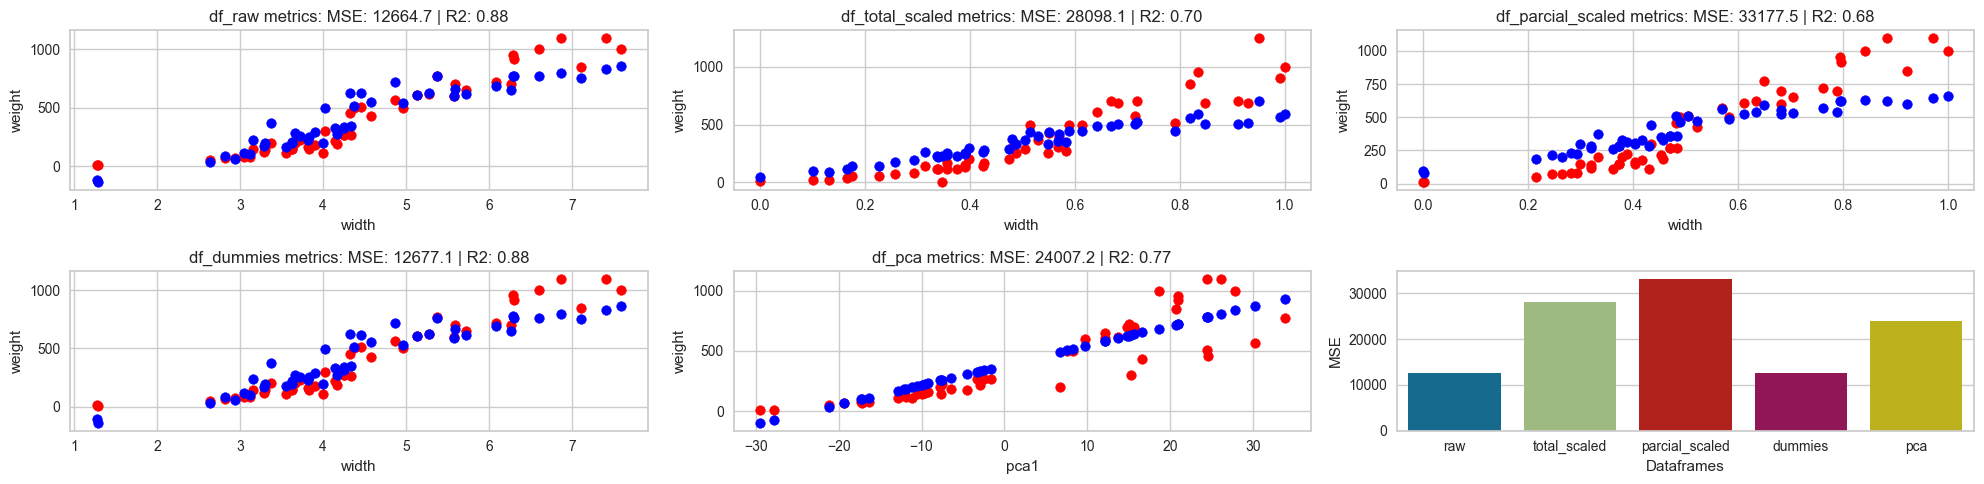

In [52]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_elasticnet_reg, raw_elasticnet_predictions, raw_elasticnet_reg_mse, raw_elasticnet_reg_r2 = fit_model(
    model=linear_model.ElasticNet(l1_ratio=0.9, alpha=2, positive=True),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_elasticnet_reg, total_scaled_elasticnet_predictions, total_scaled_elasticnet_reg_mse, total_scaled_elasticnet_reg_r2 = fit_model(
    model=linear_model.ElasticNet(l1_ratio=0.9, alpha=2, positive=True),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_elasticnet_reg, parcial_scaled_elasticnet_predictions, parcial_scaled_elasticnet_reg_mse, parcial_scaled_elasticnet_reg_r2 = fit_model(
    model=linear_model.ElasticNet(l1_ratio=0.9, alpha=2, positive=True),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_elasticnet_reg, dummies_elasticnet_predictions, dummies_elasticnet_reg_mse, dummies_elasticnet_reg_r2 = fit_model(
    model=linear_model.ElasticNet(l1_ratio=0.9, alpha=2, positive=True),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_elasticnet_reg, pca_elasticnet_predictions, pca_elasticnet_reg_mse, pca_elasticnet_reg_r2 = fit_model(
    model=linear_model.ElasticNet(l1_ratio=0.9, alpha=34, positive=True),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_elasticnet_reg_mse, total_scaled_elasticnet_reg_mse, parcial_scaled_elasticnet_reg_mse, dummies_elasticnet_reg_mse, pca_elasticnet_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

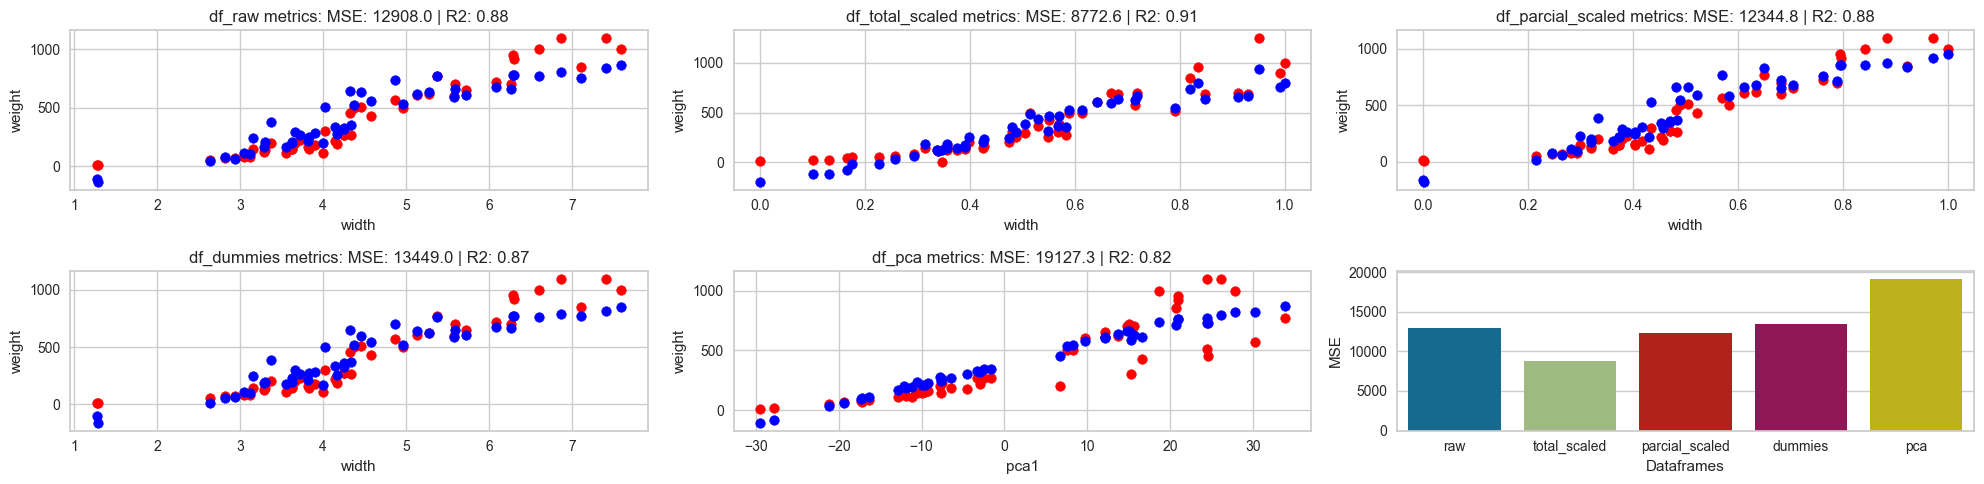

In [53]:
n_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_elasticnetcv_reg, raw_elasticnetcv_predictions, raw_elasticnetcv_reg_mse, raw_elasticnetcv_reg_r2 = fit_model(
    model=linear_model.ElasticNetCV(l1_ratio=n_list),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_elasticnetcv_reg, total_scaled_elasticnetcv_predictions, total_scaled_elasticnetcv_reg_mse, total_scaled_elasticnetcv_reg_r2 = fit_model(
    model=linear_model.ElasticNetCV(l1_ratio=n_list),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_elasticnetcv_reg, parcial_scaled_elasticnetcv_predictions, parcial_scaled_elasticnetcv_reg_mse, parcial_scaled_elasticnetcv_reg_r2 = fit_model(
    model=linear_model.ElasticNetCV(l1_ratio=n_list),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_elasticnetcv_reg, dummies_elasticnetcv_predictions, dummies_elasticnetcv_reg_mse, dummies_elasticnetcv_reg_r2 = fit_model(
    model=linear_model.ElasticNetCV(l1_ratio=n_list),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_elasticnetcv_reg, pca_elasticnetcv_predictions, pca_elasticnetcv_reg_mse, pca_elasticnetcv_reg_r2 = fit_model(
    model=linear_model.ElasticNetCV(l1_ratio=n_list),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_elasticnetcv_reg_mse, total_scaled_elasticnetcv_reg_mse, parcial_scaled_elasticnetcv_reg_mse, dummies_elasticnetcv_reg_mse, pca_elasticnetcv_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.6 MULTI-TASK ELASTIC-NET

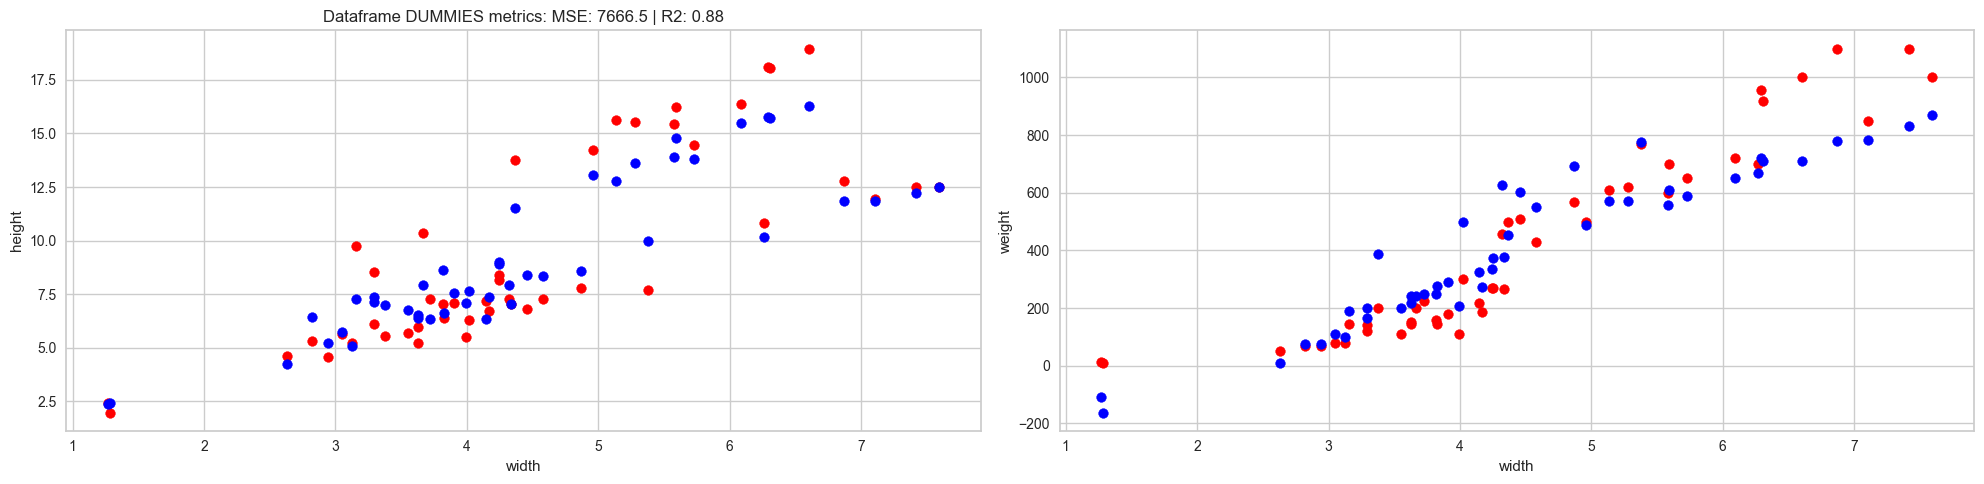

In [54]:
# definição do dataframe df_dummies_multitask
df_dummies_multitask = df_dummies.copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_dummies_multitask
dummies_multitask_X = df_dummies_multitask.drop(columns=['height', 'weight', 'species']).copy()
dummies_multitask_y = df_dummies_multitask[['height', 'weight']].copy()

# criação de dados de treino e teste do dataframe df_dummies_multitask
dummies_multitask_X_train, dummies_multitask_X_test, dummies_multitask_y_train, dummies_multitask_y_test = train_test_split(
    dummies_multitask_X,
    dummies_multitask_y,
    test_size=0.3,
    random_state=42
)

# definindo os modelos de regressão linear
elasticnet_multitask = linear_model.MultiTaskElasticNet(l1_ratio=0.9)

# realizando o treinamento para criação dos modelos
elasticnet_multitask.fit(dummies_multitask_X_train, dummies_multitask_y_train)

# realizando a predição do dataframe de teste a partir do modelo treinado
predictions_elasticnet_multitask = elasticnet_multitask.predict(dummies_multitask_X_test)
df_predictions_elasticnet_multitask = pd.DataFrame(predictions_elasticnet_multitask, columns=['height', 'weight'])

# imprimindo métricas associadas ao modelo
mse_elasticnet_multitask = mean_squared_error(dummies_multitask_y_test, predictions_elasticnet_multitask)
r2_elasticnet_multitask = r2_score(dummies_multitask_y_test, predictions_elasticnet_multitask)

# criando visualização dos ajustes para avaliação visual
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(dummies_multitask_X_test['width'], dummies_multitask_y_test['height'], color='red')
plt.scatter(dummies_multitask_X_test['width'], df_predictions_elasticnet_multitask['height'], color='blue')
plt.xlabel('width')
plt.ylabel('height')
plt.title('{} metrics: MSE: {:.1f} | R2: {:.2f}'.format('Dataframe DUMMIES', mse_elasticnet_multitask, r2_elasticnet_multitask))

plt.subplot(1, 2, 2)
plt.scatter(dummies_multitask_X_test['width'], dummies_multitask_y_test['weight'], color='red')
plt.scatter(dummies_multitask_X_test['width'], df_predictions_elasticnet_multitask['weight'], color='blue')
plt.xlabel('width')
plt.ylabel('weight')

plt.tight_layout()
plt.show()

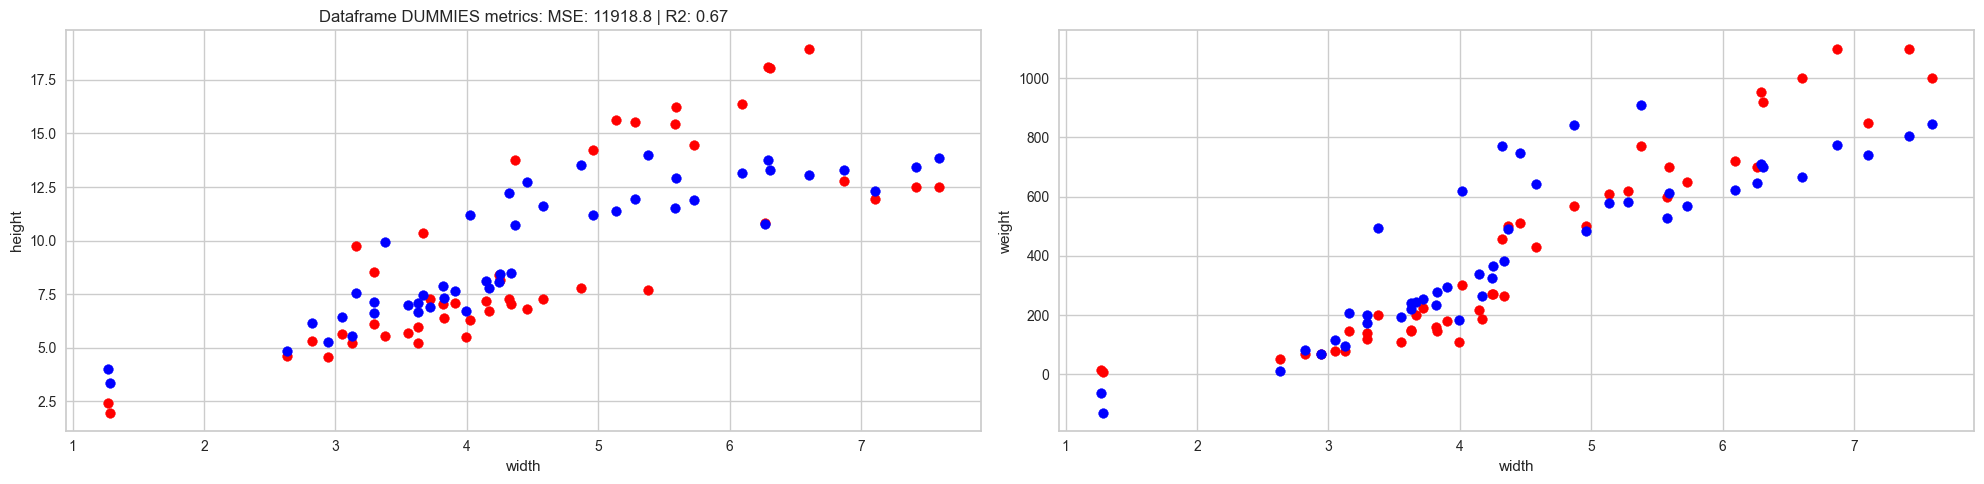

In [55]:
# definição do dataframe df_dummies_multitask
df_dummies_multitask = df_dummies.copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_dummies_multitask
dummies_multitask_X = df_dummies_multitask.drop(columns=['height', 'weight', 'species']).copy()
dummies_multitask_y = df_dummies_multitask[['height', 'weight']].copy()

# criação de dados de treino e teste do dataframe df_dummies_multitask
dummies_multitask_X_train, dummies_multitask_X_test, dummies_multitask_y_train, dummies_multitask_y_test = train_test_split(
    dummies_multitask_X,
    dummies_multitask_y,
    test_size=0.3,
    random_state=42
)

# definindo os modelos de regressão linear
elasticnetcv_multitask = linear_model.MultiTaskElasticNetCV(cv=3)

# realizando o treinamento para criação dos modelos
elasticnetcv_multitask.fit(dummies_multitask_X_train, dummies_multitask_y_train)

# realizando a predição do dataframe de teste a partir do modelo treinado
predictions_elasticnetcv_multitask = elasticnetcv_multitask.predict(dummies_multitask_X_test)
df_predictions_elasticnetcv_multitask = pd.DataFrame(predictions_elasticnetcv_multitask, columns=['height', 'weight'])

# imprimindo métricas associadas ao modelo
mse_elasticnetcv_multitask = mean_squared_error(dummies_multitask_y_test, predictions_elasticnetcv_multitask)
r2_elasticnetcv_multitask = r2_score(dummies_multitask_y_test, predictions_elasticnetcv_multitask)

# criando visualização dos ajustes para avaliação visual
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(dummies_multitask_X_test['width'], dummies_multitask_y_test['height'], color='red')
plt.scatter(dummies_multitask_X_test['width'], df_predictions_elasticnetcv_multitask['height'], color='blue')
plt.xlabel('width')
plt.ylabel('height')
plt.title('{} metrics: MSE: {:.1f} | R2: {:.2f}'.format('Dataframe DUMMIES', mse_elasticnetcv_multitask, r2_elasticnetcv_multitask))

plt.subplot(1, 2, 2)
plt.scatter(dummies_multitask_X_test['width'], dummies_multitask_y_test['weight'], color='red')
plt.scatter(dummies_multitask_X_test['width'], df_predictions_elasticnetcv_multitask['weight'], color='blue')
plt.xlabel('width')
plt.ylabel('weight')

plt.tight_layout()
plt.show()

In [56]:
coef_multitask_height_dict = {
    'Parâmetros': dummies_multitask_X.columns,
    'Lasso Multi-Task': lasso_multitask.coef_[0],
    'Elastic-Net Multi-Task': elasticnet_multitask.coef_[0],
    'Elastic-NetCV Multi-Task': elasticnetcv_multitask.coef_[0]
}
coef_multitask_weight_dict = {
    'Parâmetros': dummies_multitask_X.columns,
    'Lasso Multi-Task': lasso_multitask.coef_[1],
    'Elastic-Net Multi-Task': elasticnet_multitask.coef_[1],
    'Elastic-NetCV Multi-Task': elasticnetcv_multitask.coef_[1],
}

# criação de dataframes com coeficientes consolidados
print('\n ----> Parâmetro Alvo height <----')
df_multitask_height_coef = pd.DataFrame(coef_multitask_height_dict)
display(df_multitask_height_coef)
print('\n ----> Parâmetro Alvo weight <----')
df_multitask_weight_coef = pd.DataFrame(coef_multitask_weight_dict)
display(df_multitask_weight_coef)


 ----> Parâmetro Alvo height <----


,Parâmetros,Lasso Multi-Task,Elastic-Net Multi-Task,Elastic-NetCV Multi-Task
0,vertical_length,-1.076784,-1.219577,-0.178648
1,diagonal_length,-0.405968,-0.191095,-0.079314
2,cross_length,1.343705,1.309688,0.486646
3,width,1.639152,1.358361,0.224945
4,dummy1,0.035756,0.033584,0.069518
5,dummy2,0.041440,0.034186,0.057758
6,dummy3,0.004293,0.014008,0.058931



 ----> Parâmetro Alvo weight <----


,Parâmetros,Lasso Multi-Task,Elastic-Net Multi-Task,Elastic-NetCV Multi-Task
0,vertical_length,4.507978,4.771958,7.033109
1,diagonal_length,-2.277060,-0.703618,8.064118
2,cross_length,12.513698,12.953163,11.454835
3,width,83.992041,69.847446,11.776478
4,dummy1,-0.436608,-0.144176,0.633640
5,dummy2,-3.774693,-4.321974,-3.687505
6,dummy3,3.266668,3.769418,3.651732


# 1.1.7 LEAST ANGLE REGRESSION

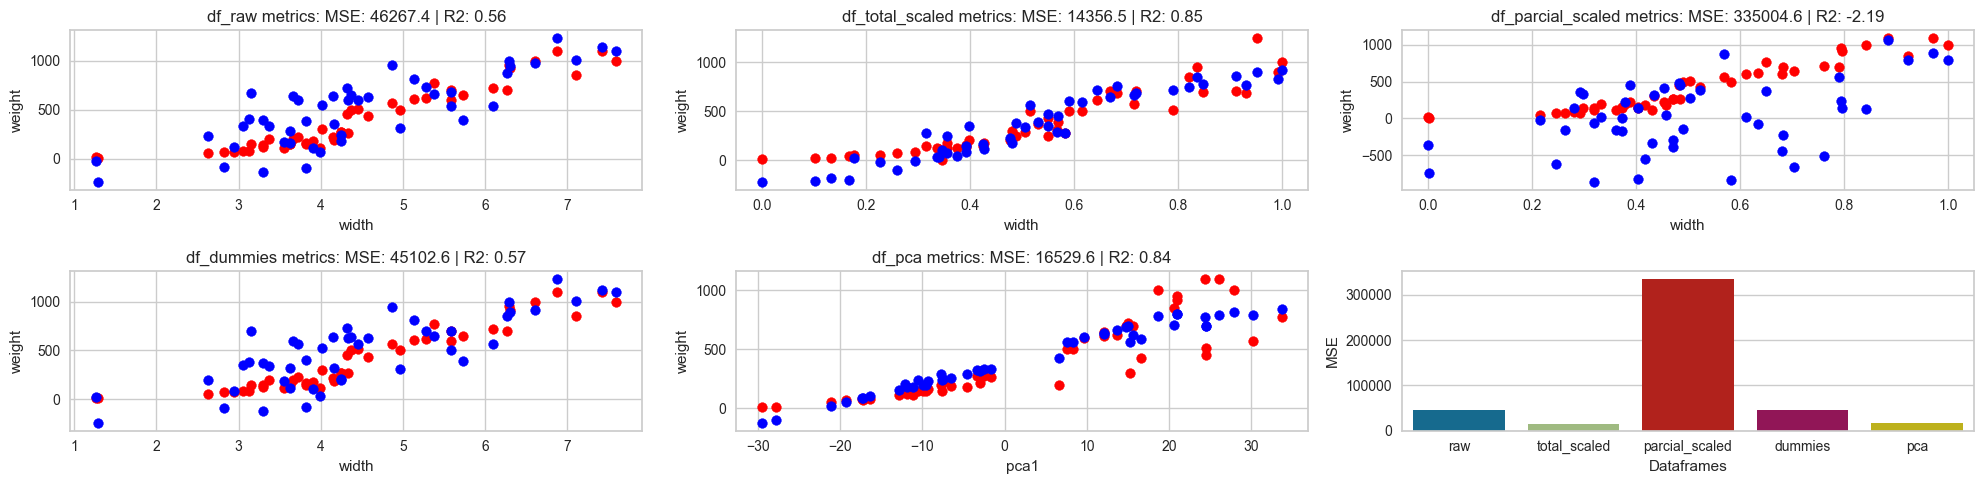

In [57]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_lars_reg, raw_lars_predictions, raw_lars_reg_mse, raw_lars_reg_r2 = fit_model(
    model=linear_model.Lars(),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_lars_reg, total_scaled_lars_predictions, total_scaled_lars_reg_mse, total_scaled_lars_reg_r2 = fit_model(
    model=linear_model.Lars(),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_lars_reg, parcial_scaled_lars_predictions, parcial_scaled_lars_reg_mse, parcial_scaled_lars_reg_r2 = fit_model(
    model=linear_model.Lars(),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_lars_reg, dummies_lars_predictions, dummies_lars_reg_mse, dummies_lars_reg_r2 = fit_model(
    model=linear_model.Lars(),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_lars_reg, pca_lars_predictions, pca_lars_reg_mse, pca_lars_reg_r2 = fit_model(
    model=linear_model.Lars(),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_lars_reg_mse, total_scaled_lars_reg_mse, parcial_scaled_lars_reg_mse, dummies_lars_reg_mse, pca_lars_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

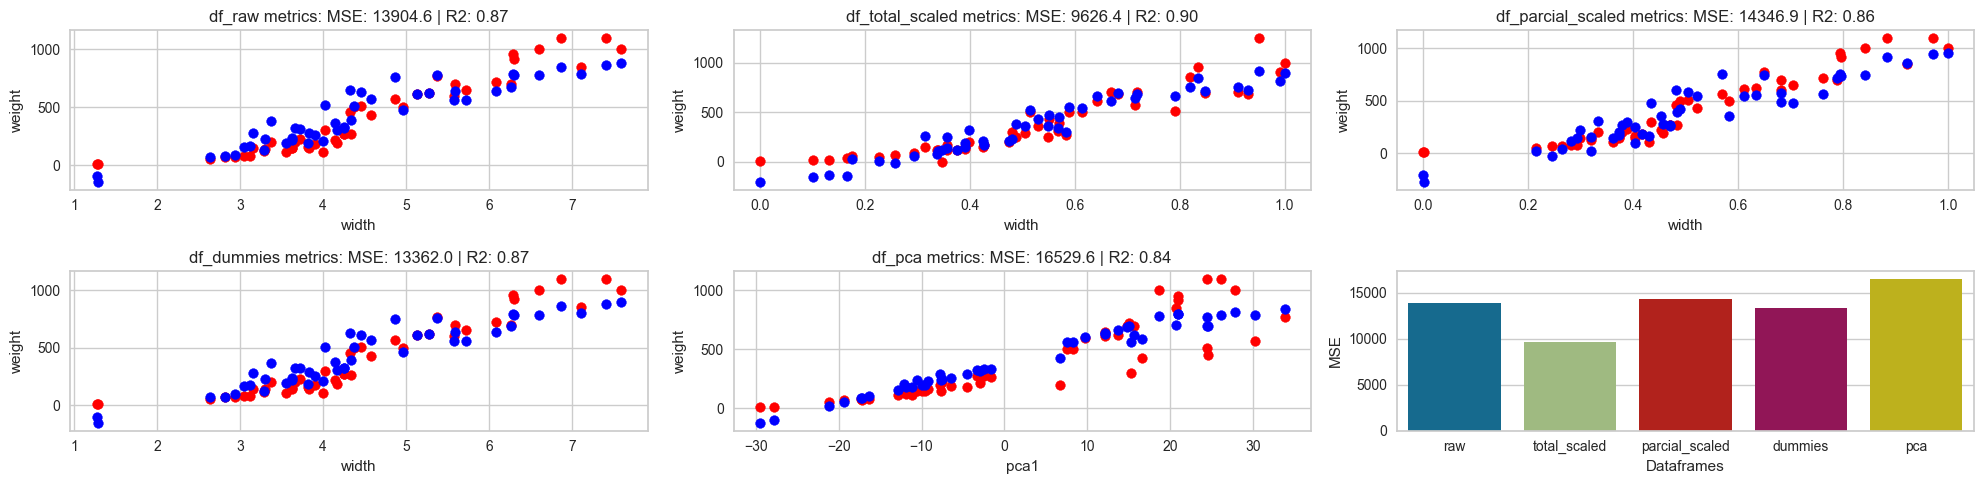

In [58]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_larscv_reg, raw_larscv_predictions, raw_larscv_reg_mse, raw_larscv_reg_r2 = fit_model(
    model=linear_model.LarsCV(cv=3),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_larscv_reg, total_scaled_larscv_predictions, total_scaled_larscv_reg_mse, total_scaled_larscv_reg_r2 = fit_model(
    model=linear_model.LarsCV(cv=3),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_larscv_reg, parcial_scaled_larscv_predictions, parcial_scaled_larscv_reg_mse, parcial_scaled_larscv_reg_r2 = fit_model(
    model=linear_model.LarsCV(cv=3),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_larscv_reg, dummies_larscv_predictions, dummies_larscv_reg_mse, dummies_larscv_reg_r2 = fit_model(
    model=linear_model.LarsCV(cv=3),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_larscv_reg, pca_larscv_predictions, pca_larscv_reg_mse, pca_larscv_reg_r2 = fit_model(
    model=linear_model.LarsCV(cv=3),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_larscv_reg_mse, total_scaled_larscv_reg_mse, parcial_scaled_larscv_reg_mse, dummies_larscv_reg_mse, pca_larscv_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.8 LEAST ANGLE REGRESSION LASSO

In [59]:
# buscando a otimização do parâmetro alpha a partir do cross-validation
raw_lassolarsCV = linear_model.LassoLarsCV(positive=True)
total_scaled_lassolarsCV = linear_model.LassoLarsCV(positive=True)
parcial_scaled_lassolarsCV = linear_model.LassoLarsCV(positive=True)
dummies_lassolarsCV = linear_model.LassoLarsCV(positive=True)
pca_lassolarsCV = linear_model.LassoLarsCV(positive=True)

# realizando o o treinamento para obtenção do valor ótimo para alpha
raw_lassolarsCV.fit(
    raw_X_test,
    raw_y_test
)
total_scaled_lassolarsCV.fit(
    total_scaled_X_test,
    total_scaled_y_test
)
parcial_scaled_lassolarsCV.fit(
    parcial_scaled_X_test,
    parcial_scaled_y_test
)
dummies_lassolarsCV.fit(
    dummies_X_test,
    dummies_y_test
)
pca_lassolarsCV.fit(
    pca_X_test,
    pca_y_test
)

# imprimindo métricas associadas ao cross-validation
print('Dataframe RAW ---> Alpha: {}'.format(raw_lassolarsCV.alpha_))
print('Dataframe TOTAL SCALED ---> Alpha: {}'.format(total_scaled_lassolarsCV.alpha_))
print('Dataframe PARCIAL SCALED ---> Alpha: {}'.format(parcial_scaled_lassolarsCV.alpha_))
print('Dataframe DUMMIES ---> Alpha: {}'.format(dummies_lassolarsCV.alpha_))
print('Dataframe PCA ---> Alpha: {}'.format(pca_lassolarsCV.alpha_))

Dataframe RAW ---> Alpha: 0.0
Dataframe TOTAL SCALED ---> Alpha: 0.0
Dataframe PARCIAL SCALED ---> Alpha: 0.8537588653018149
Dataframe DUMMIES ---> Alpha: 0.0
Dataframe PCA ---> Alpha: 0.0


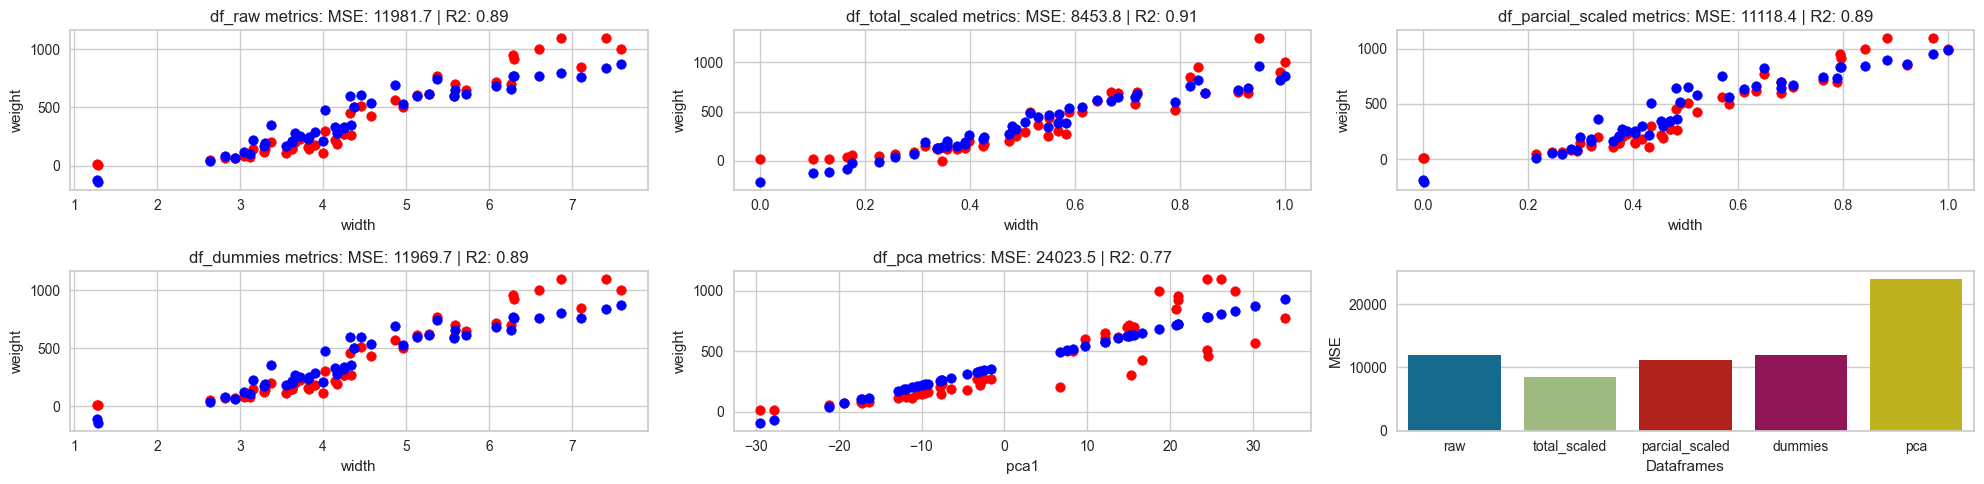

In [60]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_lassolars_reg, raw_lassolars_predictions, raw_lassolars_reg_mse, raw_lassolars_reg_r2 = fit_model(
    model=linear_model.LassoLars(alpha=0, positive=True),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_lassolars_reg, total_scaled_lassolars_predictions, total_scaled_lassolars_reg_mse, total_scaled_lassolars_reg_r2 = fit_model(
    model=linear_model.LassoLars(alpha=0, positive=True),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_lassolars_reg, parcial_scaled_lassolars_predictions, parcial_scaled_lassolars_reg_mse, parcial_scaled_lassolars_reg_r2 = fit_model(
    model=linear_model.LassoLars(alpha=0.8537588653018149, positive=True),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_lassolars_reg, dummies_lassolars_predictions, dummies_lassolars_reg_mse, dummies_lassolars_reg_r2 = fit_model(
    model=linear_model.LassoLars(alpha=0, positive=True),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_lassolars_reg, pca_lassolars_predictions, pca_lassolars_reg_mse, pca_lassolars_reg_r2 = fit_model(
    model=linear_model.LassoLars(alpha=0, positive=True),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_lassolars_reg_mse, total_scaled_lassolars_reg_mse, parcial_scaled_lassolars_reg_mse, dummies_lassolars_reg_mse, pca_lassolars_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

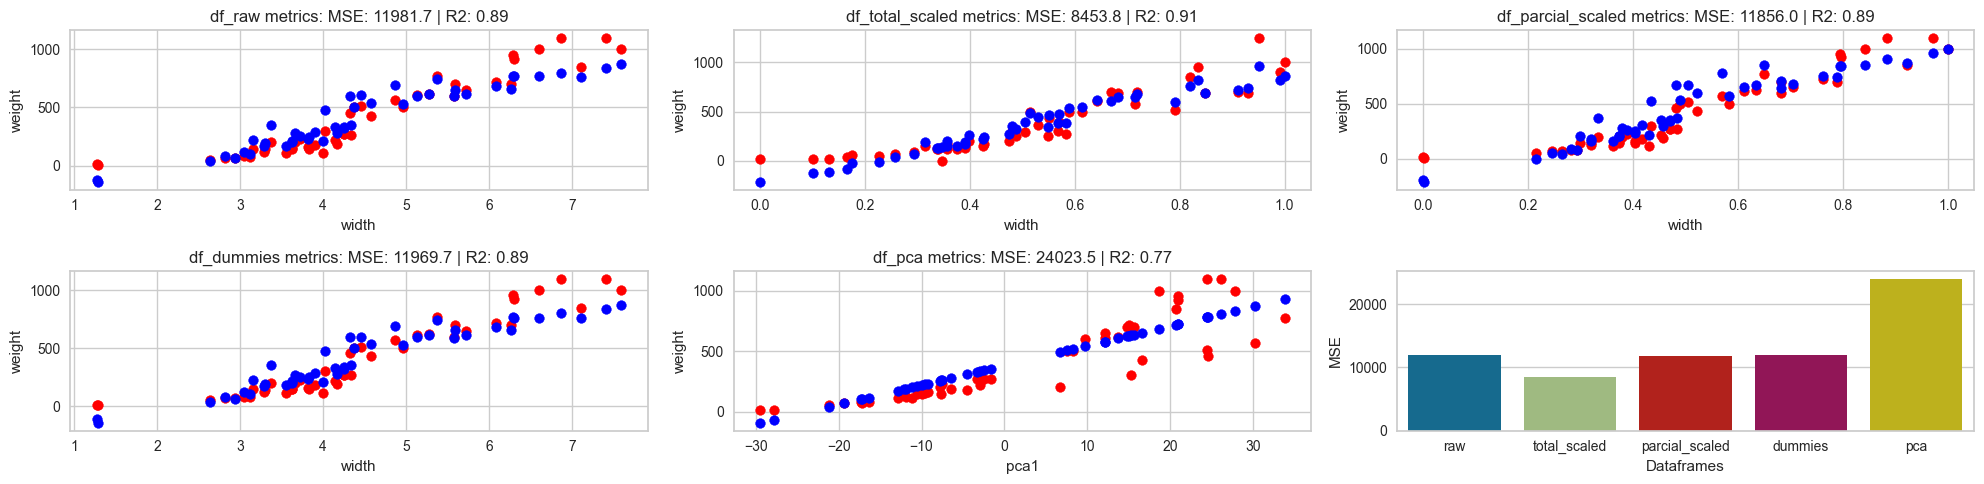

In [61]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_lassolarscv_reg, raw_lassolarscv_predictions, raw_lassolarscv_reg_mse, raw_lassolarscv_reg_r2 = fit_model(
    model=linear_model.LassoLarsCV(positive=True),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_lassolarscv_reg, total_scaled_lassolarscv_predictions, total_scaled_lassolarscv_reg_mse, total_scaled_lassolarscv_reg_r2 = fit_model(
    model=linear_model.LassoLarsCV(positive=True),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_lassolarscv_reg, parcial_scaled_lassolarscv_predictions, parcial_scaled_lassolarscv_reg_mse, parcial_scaled_lassolarscv_reg_r2 = fit_model(
    model=linear_model.LassoLarsCV(positive=True),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_lassolarscv_reg, dummies_lassolarscv_predictions, dummies_lassolarscv_reg_mse, dummies_lassolarscv_reg_r2 = fit_model(
    model=linear_model.LassoLarsCV(positive=True),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_lassolarscv_reg, pca_lassolarscv_predictions, pca_lassolarscv_reg_mse, pca_lassolarscv_reg_r2 = fit_model(
    model=linear_model.LassoLarsCV(positive=True),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_lassolarscv_reg_mse, total_scaled_lassolarscv_reg_mse, parcial_scaled_lassolarscv_reg_mse, dummies_lassolarscv_reg_mse, pca_lassolarscv_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.9 ORTHOGONAL MATCHING PURSUIT

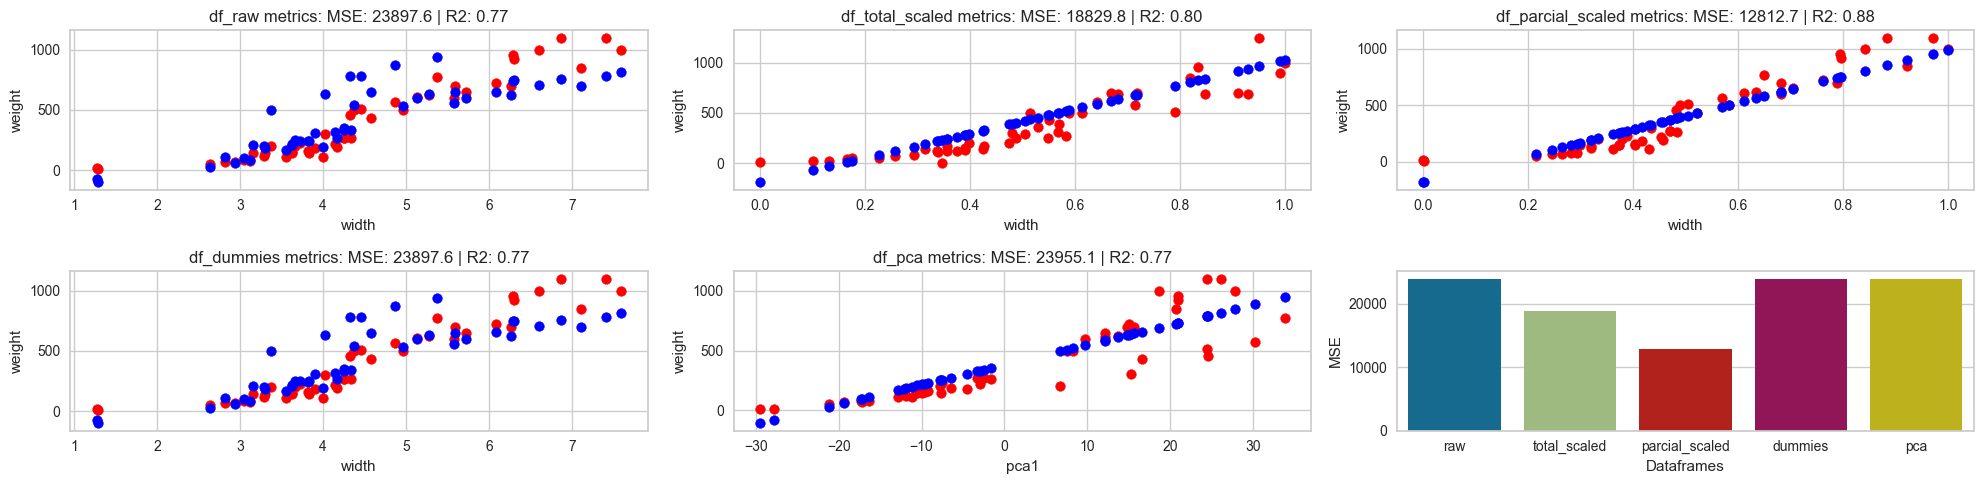

In [62]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_omp_reg, raw_omp_predictions, raw_omp_reg_mse, raw_omp_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuit(),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_omp_reg, total_scaled_omp_predictions, total_scaled_omp_reg_mse, total_scaled_omp_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuit(),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_omp_reg, parcial_scaled_omp_predictions, parcial_scaled_omp_reg_mse, parcial_scaled_omp_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuit(),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_omp_reg, dummies_omp_predictions, dummies_omp_reg_mse, dummies_omp_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuit(),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_omp_reg, pca_omp_predictions, pca_omp_reg_mse, pca_omp_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuit(),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_omp_reg_mse, total_scaled_omp_reg_mse, parcial_scaled_omp_reg_mse, dummies_omp_reg_mse, pca_omp_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

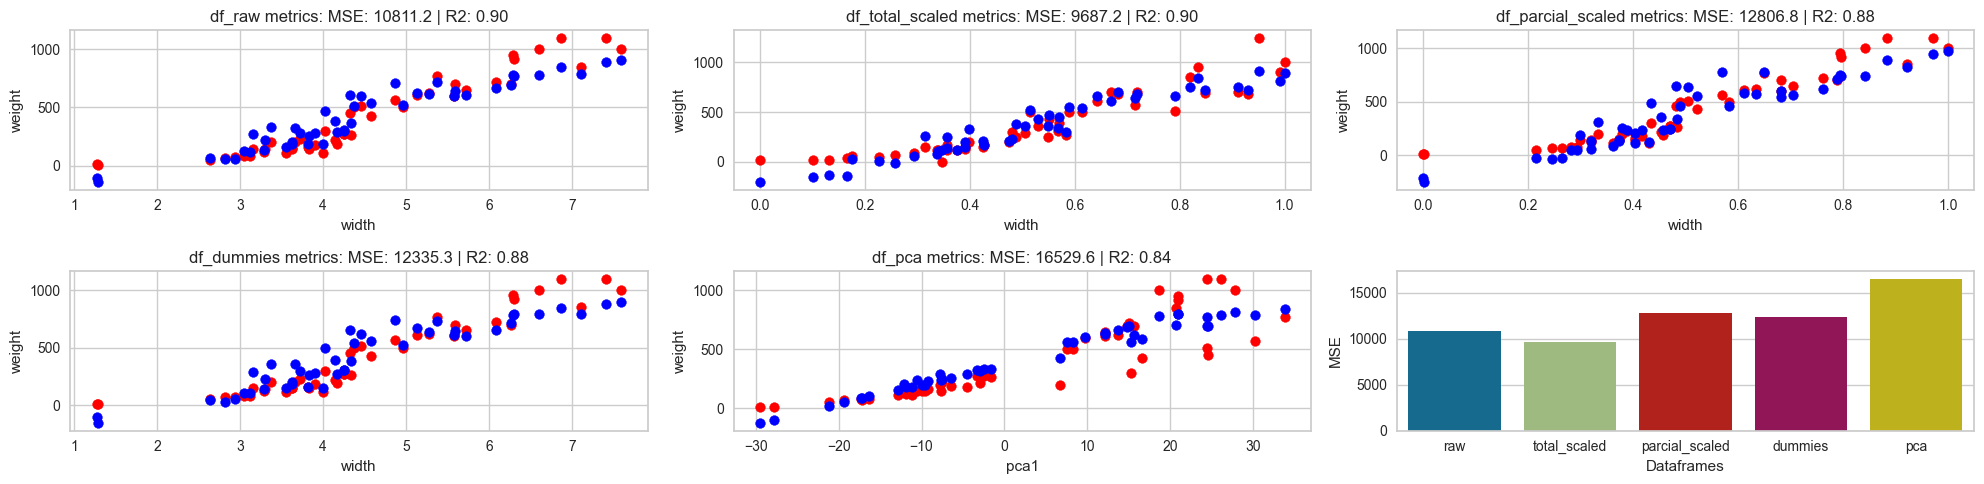

In [63]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_ompcv_reg, raw_ompcv_predictions, raw_ompcv_reg_mse, raw_ompcv_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuitCV(cv=3),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_ompcv_reg, total_scaled_ompcv_predictions, total_scaled_ompcv_reg_mse, total_scaled_ompcv_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuitCV(cv=3),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_ompcv_reg, parcial_scaled_ompcv_predictions, parcial_scaled_ompcv_reg_mse, parcial_scaled_ompcv_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuitCV(cv=3),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_ompcv_reg, dummies_ompcv_predictions, dummies_ompcv_reg_mse, dummies_ompcv_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuitCV(cv=3),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_ompcv_reg, pca_ompcv_predictions, pca_ompcv_reg_mse, pca_ompcv_reg_r2 = fit_model(
    model=linear_model.OrthogonalMatchingPursuitCV(cv=3),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_ompcv_reg_mse, total_scaled_ompcv_reg_mse, parcial_scaled_ompcv_reg_mse, dummies_ompcv_reg_mse, pca_ompcv_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.10 BAYESIAN REGRESSION

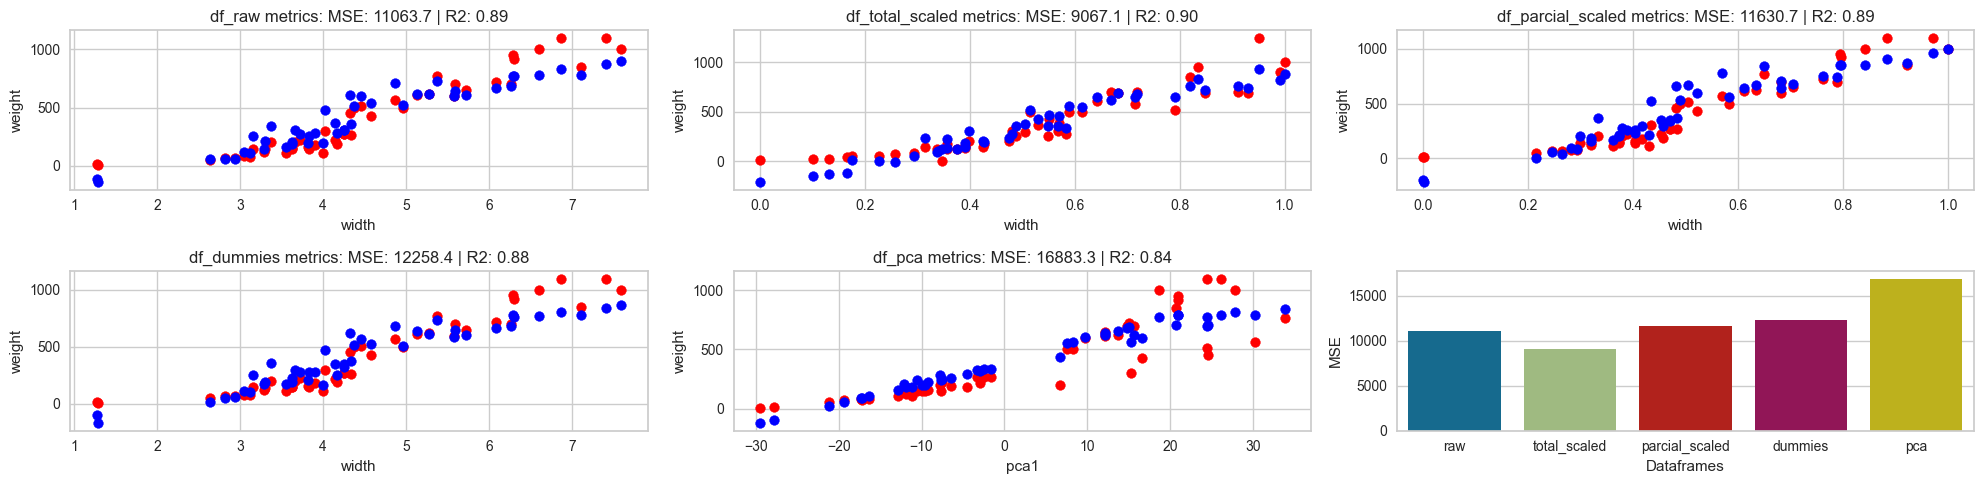

In [64]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_bayesridge_reg, raw_bayesridge_predictions, raw_bayesridge_reg_mse, raw_bayesridge_reg_r2 = fit_model(
    model=linear_model.BayesianRidge(alpha_init=0.1),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_bayesridge_reg, total_scaled_bayesridge_predictions, total_scaled_bayesridge_reg_mse, total_scaled_bayesridge_reg_r2 = fit_model(
    model=linear_model.BayesianRidge(alpha_init=0.1),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_bayesridge_reg, parcial_scaled_bayesridge_predictions, parcial_scaled_bayesridge_reg_mse, parcial_scaled_bayesridge_reg_r2 = fit_model(
    model=linear_model.BayesianRidge(alpha_init=0.1),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_bayesridge_reg, dummies_bayesridge_predictions, dummies_bayesridge_reg_mse, dummies_bayesridge_reg_r2 = fit_model(
    model=linear_model.BayesianRidge(alpha_init=0.1),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_bayesridge_reg, pca_bayesridge_predictions, pca_bayesridge_reg_mse, pca_bayesridge_reg_r2 = fit_model(
    model=linear_model.BayesianRidge(alpha_init=0.1),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_bayesridge_reg_mse, total_scaled_bayesridge_reg_mse, parcial_scaled_bayesridge_reg_mse, dummies_bayesridge_reg_mse, pca_bayesridge_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

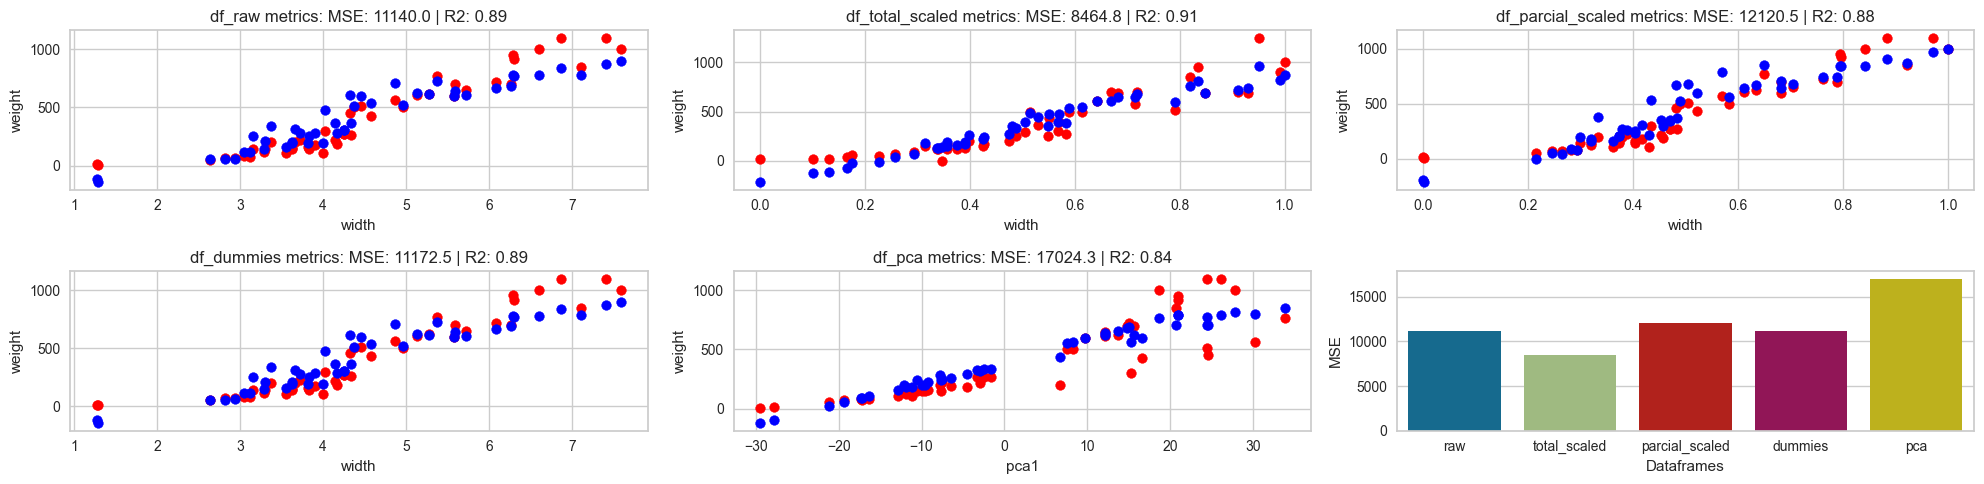

In [65]:
fig = plt.figure(figsize=(20,5))

plt.subplot(2, 3, 1)
raw_ard_reg, raw_ard_predictions, raw_ard_reg_mse, raw_ard_reg_r2 = fit_model(
    model=linear_model.ARDRegression(),
    X_train=raw_X_train,
    y_train=raw_y_train,
    X_test=raw_X_test,
    y_test=raw_y_test,
    plot_X='width',
    df_name='df_raw'
)

plt.subplot(2, 3, 2)
total_scaled_ard_reg, total_scaled_ard_predictions, total_scaled_ard_reg_mse, total_scaled_ard_reg_r2 = fit_model(
    model=linear_model.ARDRegression(),
    X_train=total_scaled_X_train,
    y_train=total_scaled_y_train,
    X_test=total_scaled_X_test,
    y_test=total_scaled_y_test,
    plot_X='width',
    df_name='df_total_scaled'
)

plt.subplot(2, 3, 3)
parcial_scaled_ard_reg, parcial_scaled_ard_predictions, parcial_scaled_ard_reg_mse, parcial_scaled_ard_reg_r2 = fit_model(
    model=linear_model.ARDRegression(),
    X_train=parcial_scaled_X_train,
    y_train=parcial_scaled_y_train,
    X_test=parcial_scaled_X_test,
    y_test=parcial_scaled_y_test,
    plot_X='width',
    df_name='df_parcial_scaled'
)

plt.subplot(2, 3, 4)
dummies_ard_reg, dummies_ard_predictions, dummies_ard_reg_mse, dummies_ard_reg_r2 = fit_model(
    model=linear_model.ARDRegression(),
    X_train=dummies_X_train,
    y_train=dummies_y_train,
    X_test=dummies_X_test,
    y_test=dummies_y_test,
    plot_X='width',
    df_name='df_dummies'
)

plt.subplot(2, 3, 5)
pca_ard_reg, pca_ard_predictions, pca_ard_reg_mse, pca_ard_reg_r2 = fit_model(
    model=linear_model.ARDRegression(),
    X_train=pca_X_train,
    y_train=pca_y_train,
    X_test=pca_X_test,
    y_test=pca_y_test,
    plot_X='pca1',
    df_name='df_pca'
)

plt.subplot(2, 3, 6)
sns.barplot(
    x = ['raw', 'total_scaled', 'parcial_scaled', 'dummies', 'pca'],
    y = [raw_ard_reg_mse, total_scaled_ard_reg_mse, parcial_scaled_ard_reg_mse, dummies_ard_reg_mse, pca_ard_reg_mse]
)
plt.xlabel('Dataframes')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# 1.1.11 LOGISTIC REGRESSION

### 1.1.11.1 Preparação dos datasets

In [66]:
# definição do dataframe df_raw_class
df_raw_class = df_raw[df_raw['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_raw
raw_class_X = df_raw_class.drop(columns=['species']).copy()
raw_class_y = df_raw_class['species'].copy()

# criação de dados de treino e teste do dataframe df_raw
raw_class_X_train, raw_class_X_test, raw_class_y_train, raw_class_y_test = train_test_split(
    raw_class_X,
    raw_class_y,
    test_size=0.3,
    random_state=42
)

In [67]:
# definição do dataframe df_total_scaled_class
df_total_scaled_class = df_total_scaled[df_total_scaled['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_total_scaled
total_scaled_class_X = df_total_scaled_class.drop(columns=['species']).copy()
total_scaled_class_y = df_total_scaled_class['species'].copy()

# criação de dados de treino e teste do dataframe df_total_scaled
total_scaled_class_X_train, total_scaled_class_X_test, total_scaled_class_y_train, total_scaled_class_y_test = train_test_split(
    total_scaled_class_X,
    total_scaled_class_y,
    test_size=0.3,
    random_state=42
)

# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in total_scaled_class_X_train.columns:
    total_scaled_class_X_train[col] = scaler.fit_transform(total_scaled_class_X_train[[col]])
    
for col in total_scaled_class_X_test.columns:
    total_scaled_class_X_test[col] = scaler.fit_transform(total_scaled_class_X_test[[col]])

In [68]:
# definição do dataframe df_parcial_scaled_class
df_parcial_scaled_class = df_parcial_scaled[df_parcial_scaled['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_parcial_scaled
parcial_scaled_class_X = df_parcial_scaled_class.drop(columns=['species']).copy()
parcial_scaled_class_y = df_parcial_scaled_class['species'].copy()

# criação de dados de treino e teste do dataframe df_parcial_scaled
parcial_scaled_class_X_train, parcial_scaled_class_X_test, parcial_scaled_class_y_train, parcial_scaled_class_y_test = train_test_split(
    parcial_scaled_class_X,
    parcial_scaled_class_y,
    test_size=0.3,
    random_state=42
)

# definição de listas auxiliares para armazenamento dos valores mínimos e máximos dos parâmetros
cols_max = []
cols_min = []

# identificação e armazenamento dos valores mínimos e máximos dos parâmetros
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    cols_max.append(parcial_scaled_class_X_train[col].max())
    cols_min.append(parcial_scaled_class_X_train[col].min())
    
# definição dos valores máximos e mínimos globais
max_ = np.max(cols_max)
min_ = np.min(cols_min)

# escalonamento, do tipo MinMaxScaler, utilizando o máximo e mínimo global do conjunto de dados selecionados
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    parcial_scaled_class_X_train[col] = parcial_scaled_class_X_train[col].apply(lambda x:
        (x - min_)/(max_ - min_)
    )
    
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in ['height', 'width', 'weight']:
    parcial_scaled_class_X_train[col] = scaler.fit_transform(parcial_scaled_class_X_train[[col]])
    
# definição de listas auxiliares para armazenamento dos valores mínimos e máximos dos parâmetros
cols_max = []
cols_min = []

# identificação e armazenamento dos valores mínimos e máximos dos parâmetros
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    cols_max.append(parcial_scaled_class_X_test[col].max())
    cols_min.append(parcial_scaled_class_X_test[col].min())
    
# definição dos valores máximos e mínimos globais
max_ = np.max(cols_max)
min_ = np.min(cols_min)

# escalonamento, do tipo MinMaxScaler, utilizando o máximo e mínimo global do conjunto de dados selecionados
for col in ['vertical_length', 'diagonal_length', 'cross_length']:
    parcial_scaled_class_X_test[col] = parcial_scaled_class_X_test[col].apply(lambda x:
        (x - min_)/(max_ - min_)
    )
    
# definição da função de escalonamento
scaler = MinMaxScaler()

# realização do escalonamento dos parâmetros
for col in ['height', 'width', 'weight']:
    parcial_scaled_class_X_test[col] = scaler.fit_transform(parcial_scaled_class_X_test[[col]])

In [69]:
# definição do dataframe df_dummies_class
df_dummies_class = df_dummies[df_dummies['species'].isin(['Perch', 'Bream'])].copy().reset_index(drop=True)

# definição das variáveis dependentes e independentes do dataframe df_dummies
dummies_class_X = df_dummies_class.drop(columns=['species']).copy()
dummies_class_y = df_dummies_class['species'].copy()

# criação de dados de treino e teste do dataframe df_dummies
dummies_class_X_train, dummies_class_X_test, dummies_class_y_train, dummies_class_y_test = train_test_split(
    dummies_class_X,
    dummies_class_y,
    test_size=0.3,
    random_state=42
)

In [70]:
# criação de embedding
pca = PCA(n_components=0.99)
df_pca_class = pd.DataFrame(pca.fit_transform(df_raw_class.drop(columns=['species'])))

# renomeando as variáveis de embbeding
df_pca_class.columns = ['pca1']

# trazendo os parâmetros categórico e target do dataframe df_raw
df_pca_class['species'] = df_raw_class['species']

# definição das variáveis dependentes e independentes do dataframe df_pca
pca_class_X = df_pca_class.drop(columns=['species']).copy()
pca_class_y = df_pca_class['species'].copy()

# criação de dados de treino e teste do dataframe df_pca
pca_class_X_train, pca_class_X_test, pca_class_y_train, pca_class_y_test = train_test_split(
    pca_class_X,
    pca_class_y,
    test_size=0.3,
    random_state=42
)

### 1.1.11.2 Classificação

In [71]:
logisticclass_dict = {
    'RAW': [raw_class_X_train, raw_class_y_train, raw_class_X_test, raw_class_y_test],
    'TOTAL SCALED': [total_scaled_class_X_train, total_scaled_class_y_train, total_scaled_class_X_test, total_scaled_class_y_test],
    'PARCIAL SCALED': [parcial_scaled_class_X_train, parcial_scaled_class_y_train, parcial_scaled_class_X_test, parcial_scaled_class_y_test],
    'DUMMIES': [dummies_class_X_train, dummies_class_y_train, dummies_class_X_test, dummies_class_y_test],
    'PCA': [pca_class_X_train, pca_class_y_train, pca_class_X_test, pca_class_y_test]
}

for i in logistic_dict.keys():
    
    # definindo o modelo de regressão Ridge
    logisticclass = linear_model.LogisticRegression()
    
    # realizando o treinamento para criação do modelo
    logisticclass.fit(
        logisticclass_dict[i][0],
        logisticclass_dict[i][1]
    )
    
    # realizando a predição do dataframe de teste a partir do modelo treinado
    logisticclass_pred = logisticclass.predict(logisticclass_dict[i][2])
    
    # imprimindo métricas associadas ao modelo
    print('\n Dataframe {}'.format(i))
    print('Accuracy: {}'.format(accuracy_score(logisticclass_dict[i][3], logisticclass_pred)))
    print(confusion_matrix(logisticclass_dict[i][3], logisticclass_pred))

NameError: name 'logistic_dict' is not defined

In [ ]:
logisticclass_dict = {
    'RAW': [raw_class_X_train, raw_class_y_train, raw_class_X_test, raw_class_y_test, 'l1'],
    'TOTAL SCALED': [total_scaled_class_X_train, total_scaled_class_y_train, total_scaled_class_X_test, total_scaled_class_y_test, 'l1'],
    'PARCIAL SCALED': [parcial_scaled_class_X_train, parcial_scaled_class_y_train, parcial_scaled_class_X_test, parcial_scaled_class_y_test, 'l1'],
    'DUMMIES': [dummies_class_X_train, dummies_class_y_train, dummies_class_X_test, dummies_class_y_test, 'l1'],
    'PCA': [pca_class_X_train, pca_class_y_train, pca_class_X_test, pca_class_y_test, 'l2']
}

for i in logistic_dict.keys():
    
    # definindo o modelo de regressão Ridge
    logisticclass = linear_model.LogisticRegression(solver='liblinear', penalty=logisticclass_dict[i][4])
    
    # realizando o treinamento para criação do modelo
    logisticclass.fit(
        logisticclass_dict[i][0],
        logisticclass_dict[i][1]
    )
    
    # realizando a predição do dataframe de teste a partir do modelo treinado
    logisticclass_pred = logisticclass.predict(logisticclass_dict[i][2])
    
    # imprimindo métricas associadas ao modelo
    print('\n Dataframe {}'.format(i))
    print('Accuracy: {}'.format(accuracy_score(logisticclass_dict[i][3], logisticclass_pred)))
    print(confusion_matrix(logisticclass_dict[i][3], logisticclass_pred))

In [ ]:
logisticclass_dict = {
    'RAW': [raw_class_X_train, raw_class_y_train, raw_class_X_test, raw_class_y_test, 0.9],
    'TOTAL SCALED': [total_scaled_class_X_train, total_scaled_class_y_train, total_scaled_class_X_test, total_scaled_class_y_test, 0.9],
    'PARCIAL SCALED': [parcial_scaled_class_X_train, parcial_scaled_class_y_train, parcial_scaled_class_X_test, parcial_scaled_class_y_test, 0.9],
    'DUMMIES': [dummies_class_X_train, dummies_class_y_train, dummies_class_X_test, dummies_class_y_test, 0.9],
    'PCA': [pca_class_X_train, pca_class_y_train, pca_class_X_test, pca_class_y_test, 0.9]
}

for i in logistic_dict.keys():
    
    # definindo o modelo de regressão Ridge
    logisticclass = linear_model.LogisticRegression(solver='liblinear', l1_ratio=logisticclass_dict[i][4])
    
    # realizando o treinamento para criação do modelo
    logisticclass.fit(
        logisticclass_dict[i][0],
        logisticclass_dict[i][1]
    )
    
    # realizando a predição do dataframe de teste a partir do modelo treinado
    logisticclass_pred = logisticclass.predict(logisticclass_dict[i][2])
    
    # imprimindo métricas associadas ao modelo
    print('\n Dataframe {}'.format(i))
    print('Accuracy: {}'.format(accuracy_score(logisticclass_dict[i][3], logisticclass_pred)))
    print(confusion_matrix(logisticclass_dict[i][3], logisticclass_pred))

# MÉTRICAS CONSOLIDADAS

In [ ]:
# definição da lista com consolidação das métricas do modelo
mse_list = [
    ['LinearRefression', raw_linear_reg_mse, total_scaled_linear_reg_mse, parcial_scaled_linear_reg_mse, dummies_linear_reg_mse, pca_linear_reg_mse],
    ['Ridge', raw_ridge_reg_mse, total_scaled_ridge_reg_mse, parcial_scaled_ridge_reg_mse, dummies_ridge_reg_mse, pca_ridge_reg_mse],
    ['RidgeCV', raw_ridgecv_reg_mse, total_scaled_ridgecv_reg_mse, parcial_scaled_ridgecv_reg_mse, dummies_ridgecv_reg_mse, pca_ridgecv_reg_mse],
    ['Lasso', raw_lasso_reg_mse, total_scaled_lasso_reg_mse, parcial_scaled_lasso_reg_mse, dummies_lasso_reg_mse, pca_lasso_reg_mse],
    ['LassoCV', raw_lassocv_reg_mse, total_scaled_lassocv_reg_mse, parcial_scaled_lassocv_reg_mse, dummies_lassocv_reg_mse, pca_lassocv_reg_mse],
    ['ElasticNet', raw_elasticnet_reg_mse, total_scaled_elasticnet_reg_mse, parcial_scaled_elasticnet_reg_mse, dummies_elasticnet_reg_mse, pca_elasticnet_reg_mse],
    ['ElasticNetCV', raw_elasticnetcv_reg_mse, total_scaled_elasticnetcv_reg_mse, parcial_scaled_elasticnetcv_reg_mse, dummies_elasticnetcv_reg_mse, pca_elasticnetcv_reg_mse],
    ['LaestAngleRegression', raw_lars_reg_mse, total_scaled_lars_reg_mse, parcial_scaled_lars_reg_mse, dummies_lars_reg_mse, pca_lars_reg_mse],
    ['LaestAngleRegressionCV', raw_larscv_reg_mse, total_scaled_larscv_reg_mse, parcial_scaled_larscv_reg_mse, dummies_larscv_reg_mse, pca_larscv_reg_mse],
    ['Lasso LaestAngleRegression', raw_lassolars_reg_mse, total_scaled_lassolars_reg_mse, parcial_scaled_lassolars_reg_mse, dummies_lassolars_reg_mse, pca_lassolars_reg_mse],
    ['Lasso LaestAngleRegressionCV', raw_lassolarscv_reg_mse, total_scaled_lassolarscv_reg_mse, parcial_scaled_lassolarscv_reg_mse, dummies_lassolarscv_reg_mse, pca_lassolarscv_reg_mse],
    ['OrthogonalMatchingPursuit', raw_omp_reg_mse, total_scaled_omp_reg_mse, parcial_scaled_omp_reg_mse, dummies_omp_reg_mse, pca_omp_reg_mse],
    ['OrthogonalMatchingPursuitCV', raw_ompcv_reg_mse, total_scaled_ompcv_reg_mse, parcial_scaled_ompcv_reg_mse, dummies_ompcv_reg_mse, pca_ompcv_reg_mse],
    ['BayesianRidge', raw_bayesridge_reg_mse, total_scaled_bayesridge_reg_mse, parcial_scaled_bayesridge_reg_mse, dummies_bayesridge_reg_mse, pca_bayesridge_reg_mse],
    ['ARDRegression', raw_ard_reg_mse, total_scaled_ard_reg_mse, parcial_scaled_ard_reg_mse, dummies_ard_reg_mse, pca_ard_reg_mse]
]
r2_list = [
    ['LinearRefression', raw_linear_reg_r2, total_scaled_linear_reg_r2, parcial_scaled_linear_reg_r2, dummies_linear_reg_r2, pca_linear_reg_r2],
    ['Ridge', raw_ridge_reg_r2, total_scaled_ridge_reg_r2, parcial_scaled_ridge_reg_r2, dummies_ridge_reg_r2, pca_ridge_reg_r2],
    ['RidgeCV', raw_ridgecv_reg_r2, total_scaled_ridgecv_reg_r2, parcial_scaled_ridgecv_reg_r2, dummies_ridgecv_reg_r2, pca_ridgecv_reg_r2],
    ['Lasso', raw_lasso_reg_r2, total_scaled_lasso_reg_r2, parcial_scaled_lasso_reg_r2, dummies_lasso_reg_r2, pca_lasso_reg_r2],
    ['LassoCV', raw_lassocv_reg_r2, total_scaled_lassocv_reg_r2, parcial_scaled_lassocv_reg_r2, dummies_lassocv_reg_r2, pca_lassocv_reg_r2],
    ['ElasticNet', raw_elasticnet_reg_r2, total_scaled_elasticnet_reg_r2, parcial_scaled_elasticnet_reg_r2, dummies_elasticnet_reg_r2, pca_elasticnet_reg_r2],
    ['ElasticNetCV', raw_elasticnetcv_reg_r2, total_scaled_elasticnetcv_reg_r2, parcial_scaled_elasticnetcv_reg_r2, dummies_elasticnetcv_reg_r2, pca_elasticnetcv_reg_r2],
    ['LaestAngleRegression', raw_lars_reg_r2, total_scaled_lars_reg_r2, parcial_scaled_lars_reg_r2, dummies_lars_reg_r2, pca_lars_reg_r2],
    ['LaestAngleRegressionCV', raw_larscv_reg_r2, total_scaled_larscv_reg_r2, parcial_scaled_larscv_reg_r2, dummies_larscv_reg_r2, pca_larscv_reg_r2],
    ['LassoLaestAngleRegression', raw_lassolars_reg_r2, total_scaled_lassolars_reg_r2, parcial_scaled_lassolars_reg_r2, dummies_lassolars_reg_r2, pca_lassolars_reg_r2],
    ['LassoLaestAngleRegressionCV', raw_lassolarscv_reg_r2, total_scaled_lassolarscv_reg_r2, parcial_scaled_lassolarscv_reg_r2, dummies_lassolarscv_reg_r2, pca_lassolarscv_reg_r2],
    ['OrthogonalMatchingPursuit', raw_omp_reg_r2, total_scaled_omp_reg_r2, parcial_scaled_omp_reg_r2, dummies_omp_reg_r2, pca_omp_reg_r2],
    ['OrthogonalMatchingPursuitCV', raw_ompcv_reg_r2, total_scaled_ompcv_reg_r2, parcial_scaled_ompcv_reg_r2, dummies_ompcv_reg_r2, pca_ompcv_reg_r2],
    ['BayesianRidge', raw_bayesridge_reg_r2, total_scaled_bayesridge_reg_r2, parcial_scaled_bayesridge_reg_r2, dummies_bayesridge_reg_r2, pca_bayesridge_reg_r2],
    ['ARDRegression', raw_ard_reg_r2, total_scaled_ard_reg_r2, parcial_scaled_ard_reg_r2, dummies_ard_reg_r2, pca_ard_reg_r2]
]

# criação de dataframes com métricas consolidadas
df_mse = pd.DataFrame(
    mse_list,
    columns=['Modelo', 'df_raw', 'df_total_scaled', 'df_parcial_scaled', 'df_dummies', 'df_pca']
)
df_r2 = pd.DataFrame(
    r2_list,
    columns=['Modelo', 'df_raw', 'df_total_scaled', 'df_parcial_scaled', 'df_dummies', 'df_pca']
)

print('----> MSE <----')
display(df_mse)
print('\n ----> R2 <----')
display(df_r2)

In [ ]:
# definição de dicionários com consolidação dos coeficientes dos parâmetros a partir dos ajustes do modelo
coef_raw_dict = {
    'Parâmetros': raw_X.columns,
    'LinearRegression': raw_linear_reg.coef_,
    'Ridge': raw_ridge_reg.coef_,
    'RidgeCV': raw_ridgecv_reg.coef_,
    'Lasso': raw_lasso_reg.coef_,
    'LassoCV': raw_lassocv_reg.coef_,
    'ElasticNet': raw_elasticnet_reg.coef_,
    'ElasticNetCV': raw_elasticnetcv_reg.coef_,
    'LeastAngleRegression': raw_lars_reg.coef_,
    'LeastAngleRegressionCV': raw_larscv_reg.coef_,
    'Lasso LeastAngleRegression': raw_lassolars_reg.coef_,
    'Lasso LeastAngleRegressionCV': raw_lassolarscv_reg.coef_,
    'OrthogonalMatchingPursuit': raw_omp_reg.coef_,
    'OrthogonalMatchingPursuitCV': raw_ompcv_reg.coef_,
    'BayesianRidge': raw_bayesridge_reg.coef_,
    'ARDRegression': raw_ard_reg.coef_
}
coef_total_scaled_dict = {
    'Parâmetros': total_scaled_X.columns,
    'LinearRegression': total_scaled_linear_reg.coef_,
    'Ridge': total_scaled_ridge_reg.coef_,
    'RidgeCV': total_scaled_ridgecv_reg.coef_,
    'Lasso': total_scaled_lasso_reg.coef_,
    'LassoCV': total_scaled_lassocv_reg.coef_,
    'ElasticNet': total_scaled_elasticnet_reg.coef_,
    'ElasticNetCV': total_scaled_elasticnetcv_reg.coef_,
    'LeastAngleRegression': total_scaled_lars_reg.coef_,
    'LeastAngleRegressionCV': total_scaled_larscv_reg.coef_,
    'Lasso LeastAngleRegression': total_scaled_lassolars_reg.coef_,
    'Lasso LeastAngleRegressionCV': total_scaled_lassolarscv_reg.coef_,
    'OrthogonalMatchingPursuit': total_scaled_omp_reg.coef_,
    'OrthogonalMatchingPursuitCV': total_scaled_ompcv_reg.coef_,
    'BayesianRidge': total_scaled_bayesridge_reg.coef_,
    'ARDRegression': total_scaled_ard_reg.coef_
}
coef_parcial_scaled_dict = {
    'Parâmetros': parcial_scaled_X.columns,
    'LinearRegression': parcial_scaled_linear_reg.coef_,
    'Ridge': parcial_scaled_ridge_reg.coef_,
    'RidgeCV': parcial_scaled_ridgecv_reg.coef_,
    'Lasso': parcial_scaled_lasso_reg.coef_,
    'LassoCV': parcial_scaled_lassocv_reg.coef_,
    'ElasticNet': parcial_scaled_elasticnet_reg.coef_,
    'ElasticNetCV': parcial_scaled_elasticnetcv_reg.coef_,
    'LeastAngleRegression': parcial_scaled_lars_reg.coef_,
    'LeastAngleRegressionCV': parcial_scaled_larscv_reg.coef_,
    'Lasso LeastAngleRegression': parcial_scaled_lassolars_reg.coef_,
    'Lasso LeastAngleRegressionCV': parcial_scaled_lassolarscv_reg.coef_,
    'OrthogonalMatchingPursuit': parcial_scaled_omp_reg.coef_,
    'OrthogonalMatchingPursuitCV': parcial_scaled_ompcv_reg.coef_,
    'BayesianRidge': parcial_scaled_bayesridge_reg.coef_,
    'ARDRegression': parcial_scaled_ard_reg.coef_
}
coef_dummies_dict = {
    'Parâmetros': dummies_X.columns,
    'LinearRegression': dummies_linear_reg.coef_,
    'Ridge': dummies_ridge_reg.coef_,
    'RidgeCV': dummies_ridgecv_reg.coef_,
    'Lasso': dummies_lasso_reg.coef_,
    'LassoCV': dummies_lassocv_reg.coef_,
    'ElasticNet': dummies_elasticnet_reg.coef_,
    'ElasticNetCV': dummies_elasticnetcv_reg.coef_,
    'LeastAngleRegression': dummies_lars_reg.coef_,
    'LeastAngleRegressionCV': dummies_larscv_reg.coef_,
    'Lasso LeastAngleRegression': dummies_lassolars_reg.coef_,
    'Lasso LeastAngleRegressionCV': dummies_lassolarscv_reg.coef_,
    'OrthogonalMatchingPursuit': dummies_omp_reg.coef_,
    'OrthogonalMatchingPursuitCV': dummies_ompcv_reg.coef_,
    'BayesianRidge': dummies_bayesridge_reg.coef_,
    'ARDRegression': dummies_ard_reg.coef_
}
coef_pca_dict = {
    'Parâmetros': pca_X.columns,
    'LinearRegression': pca_linear_reg.coef_,
    'Ridge': pca_ridge_reg.coef_,
    'RidgeCV': pca_ridgecv_reg.coef_,
    'Lasso': pca_lasso_reg.coef_,
    'LassoCV': pca_lassocv_reg.coef_,
    'ElasticNet': pca_elasticnet_reg.coef_,
    'ElasticNetCV': pca_elasticnetcv_reg.coef_,
    'LeastAngleRegression': pca_lars_reg.coef_,
    'LeastAngleRegressionCV': pca_larscv_reg.coef_,
    'Lasso LeastAngleRegression': pca_lassolars_reg.coef_,
    'Lasso LeastAngleRegressionCV': pca_lassolarscv_reg.coef_,
    'OrthogonalMatchingPursuit': pca_omp_reg.coef_,
    'OrthogonalMatchingPursuitCV': pca_ompcv_reg.coef_,
    'BayesianRidge': pca_bayesridge_reg.coef_,
    'ARDRegression': pca_ard_reg.coef_
}

# criação de dataframes com coeficientes consolidados
df_raw_coef = pd.DataFrame(coef_raw_dict)
df_total_scaled_coef = pd.DataFrame(coef_total_scaled_dict)
df_parcial_scaled_coef = pd.DataFrame(coef_parcial_scaled_dict)
df_dummies_coef = pd.DataFrame(coef_dummies_dict)
df_pca_coef = pd.DataFrame(coef_pca_dict)

print('----> df_raw <----')
display(df_raw_coef)
print('----> df_total_scaled <----')
display(df_total_scaled_coef)
print('----> df_parcial_scaled <----')
display(df_parcial_scaled_coef)
print('\n ----> df_dummies <----')
display(df_dummies_coef)
print('\n ----> df_pca <----')
display(df_pca_coef)